# Importing Libraries

In [1]:
import sys
import os


module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"\\model")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [3]:
from knn import DT
from logistic import LR
# from xgboost import XG
from loadDvc import dvcData

# Splitting and versioning data

We split and version the data according to platform and browser.we use dvc a data versioning platform to acces the already split data

In [8]:
dvcInstance=dvcData()
platformData=dvcInstance.getData('data/AdSmartABdata.csv','https://github.com/Blvisse/ABtesting','cbf35f6e43a99698ba53718ed8a8c8da8f3da722')
browserData=dvcInstance.getData('data/AdSmartABdata.csv','https://github.com/Blvisse/ABtesting','f2ee815f7d230722139cdb43b3817f44a1ce9064')


In [9]:
#lets have a look at the datasets
#the brwoser dataset contains data details about each user and browser 
browserData

auction_id experiment        date  hour  \
0     0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1     000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2     0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3     00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4     001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   
...                                    ...        ...         ...   ...   
8072  ffea24ec-cec1-43fb-b1d1-8f93828c2be2    exposed  2020-07-05     7   
8073  ffea3210-2c3e-426f-a77d-0aa72e73b20f    control  2020-07-03    15   
8074  ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7    control  2020-07-04     9   
8075  ffeeed62-3f7c-4a6e-8ba7-95d303d40969    exposed  2020-07-05    15   
8076  fffbb9ff-568a-41a5-a0c3-6866592f80d8    control  2020-07-10    14   

             device_make                browser  yes  no  
0     Generic Smartphone          Chrome Mobile    0   0  
1     Generic Smartphone          Chrome Mobile    0   0  
2                  E5823  Chrome Mobile WebView    0   1  
3      Samsung SM-A705FN               Facebook    0   0  
4     Generic Smartphone          Chrome Mobile    0   0  
...                  ...                    ...  ...  ..  
8072  Generic Smartphone          Chrome Mobile    0   0  
8073  Generic Smartphone          Chrome Mobile    0   0  
8074  Generic Smartphone          Chrome Mobile    0   0  
8075    Samsung SM-A515F       Samsung Internet    0   0  
8076    Samsung SM-G960F               Facebook    0   0  

[8077 rows x 8 columns]

In [10]:
#the platform data is plit on platform_os 
platformData


auction_id experiment        date  hour  \
0     0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1     000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2     0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3     00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4     001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   
...                                    ...        ...         ...   ...   
8072  ffea24ec-cec1-43fb-b1d1-8f93828c2be2    exposed  2020-07-05     7   
8073  ffea3210-2c3e-426f-a77d-0aa72e73b20f    control  2020-07-03    15   
8074  ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7    control  2020-07-04     9   
8075  ffeeed62-3f7c-4a6e-8ba7-95d303d40969    exposed  2020-07-05    15   
8076  fffbb9ff-568a-41a5-a0c3-6866592f80d8    control  2020-07-10    14   

             device_make  platform_os  yes  no  
0     Generic Smartphone            6    0   0  
1     Generic Smartphone            6    0   0  
2                  E5823            6    0   1  
3      Samsung SM-A705FN            6    0   0  
4     Generic Smartphone            6    0   0  
...                  ...          ...  ...  ..  
8072  Generic Smartphone            6    0   0  
8073  Generic Smartphone            6    0   0  
8074  Generic Smartphone            6    0   0  
8075    Samsung SM-A515F            6    0   0  
8076    Samsung SM-G960F            6    0   0  

[8077 rows x 8 columns]

## Data Cleaning and Spliting

We split data into training,testing and split but first we clean, and encode our categorical columns

## Platform Data

In [11]:
#We split tha data into training,testing and validation sets

dtInstance=DT(platformData)
pData=dtInstance.cleancolumns(['experiment','device_make','platform_os'])


Getting dataset
Creating features
Done..


In [12]:
pData

hour  experiment_control  experiment_exposed  device_make_5008Y_EEA  \
0        8                   0                   1                      0   
1       10                   0                   1                      0   
2        2                   0                   1                      0   
3       15                   1                   0                      0   
4       15                   1                   0                      0   
...    ...                 ...                 ...                    ...   
8072     7                   0                   1                      0   
8073    15                   1                   0                      0   
8074     9                   1                   0                      0   
8075    15                   0                   1                      0   
8076    14                   1                   0                      0   

      device_make_5099Y  device_make_6039Y  device_make_A0001  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
8072                  0                  0                  0   
8073                  0                  0                  0   
8074                  0                  0                  0   
8075                  0                  0                  0   
8076                  0                  0                  0   

      device_make_ALE-L21  device_make_ANE-LX1  device_make_ATU-L11  ...  \
0                       0                    0                    0  ...   
1                       0                    0                    0  ...   
2                       0                    0                    0  ...   
3                       0                    0                    0  ...   
4                       0                    0                    0  ...   
...                   ...                  ...                  ...  ...   
8072                    0                    0                    0  ...   
8073                    0                    0                    0  ...   
8074                    0                    0                    0  ...   
8075                    0                    0                    0  ...   
8076                    0                    0                    0  ...   

      device_make_XiaoMi Redmi Note 8T  device_make_XiaoMi Redmi S2  \
0                                    0                            0   
1                                    0                            0   
2                                    0                            0   
3                                    0                            0   
4                                    0                            0   
...                                ...                          ...   
8072                                 0                            0   
8073                                 0                            0   
8074                                 0                            0   
8075                                 0                            0   
8076                                 0                            0   

      device_make_YAL-L21  device_make_iPhone  device_make_moto e5 play  \
0                       0                   0                         0   
1                       0                   0                         0   
2                       0                   0                         0   
3                       0                   0                         0   
4                       0                   0                         0   
...                   ...                 ...                       ...   
8072     

We now carry out splitting of data

### Decision Tree

In [13]:
#we split data in the following ratio 70% train 20% validation and 10 % test
dtInstance=DT(pData)
X_train,X_test,y_train,y_test,X_val,py_val=dtInstance.splitData()

Spliting data into train,test samples
Fitting transformer
Done..


Applying 5 fold cross validation
Training and spliting data.. fold number 1 
Train: [1616 1617 1618 ... 8074 8075 8076] Validation: [   0    1    2 ... 1613 1614 1615]
Training and spliting data.. fold number 1 
Accuray for split 1 ----,0.9356435643564357 ----- precision 0.9356435643564357,-----f1 score 0.9667519181585678 
Train: [   0    1    2 ... 8074 8075 8076] Validation: [1616 1617 1618 ... 3229 3230 3231]
Training and spliting data.. fold number 2 
Accuray for split 2 ----,0.9393564356435643 ----- precision 0.9393564356435642,-----f1 score 0.9687300574345883 
Train: [   0    1    2 ... 8074 8075 8076] Validation: [3232 3233 3234 ... 4844 4845 4846]
Training and spliting data.. fold number 3 
Accuray for split 3 ----,0.9306501547987616 ----- precision 0.9306501547987617,-----f1 score 0.9640795381654906 
Train: [   0    1    2 ... 8074 8075 8076] Validation: [4847 4848 4849 ... 6459 6460 6461]
Training and spliting data.. fold number 4 
Accuray for split 4 ----,0.9157894736842105 

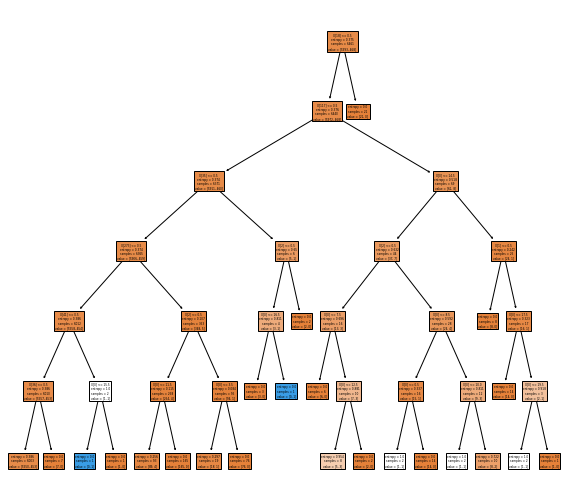

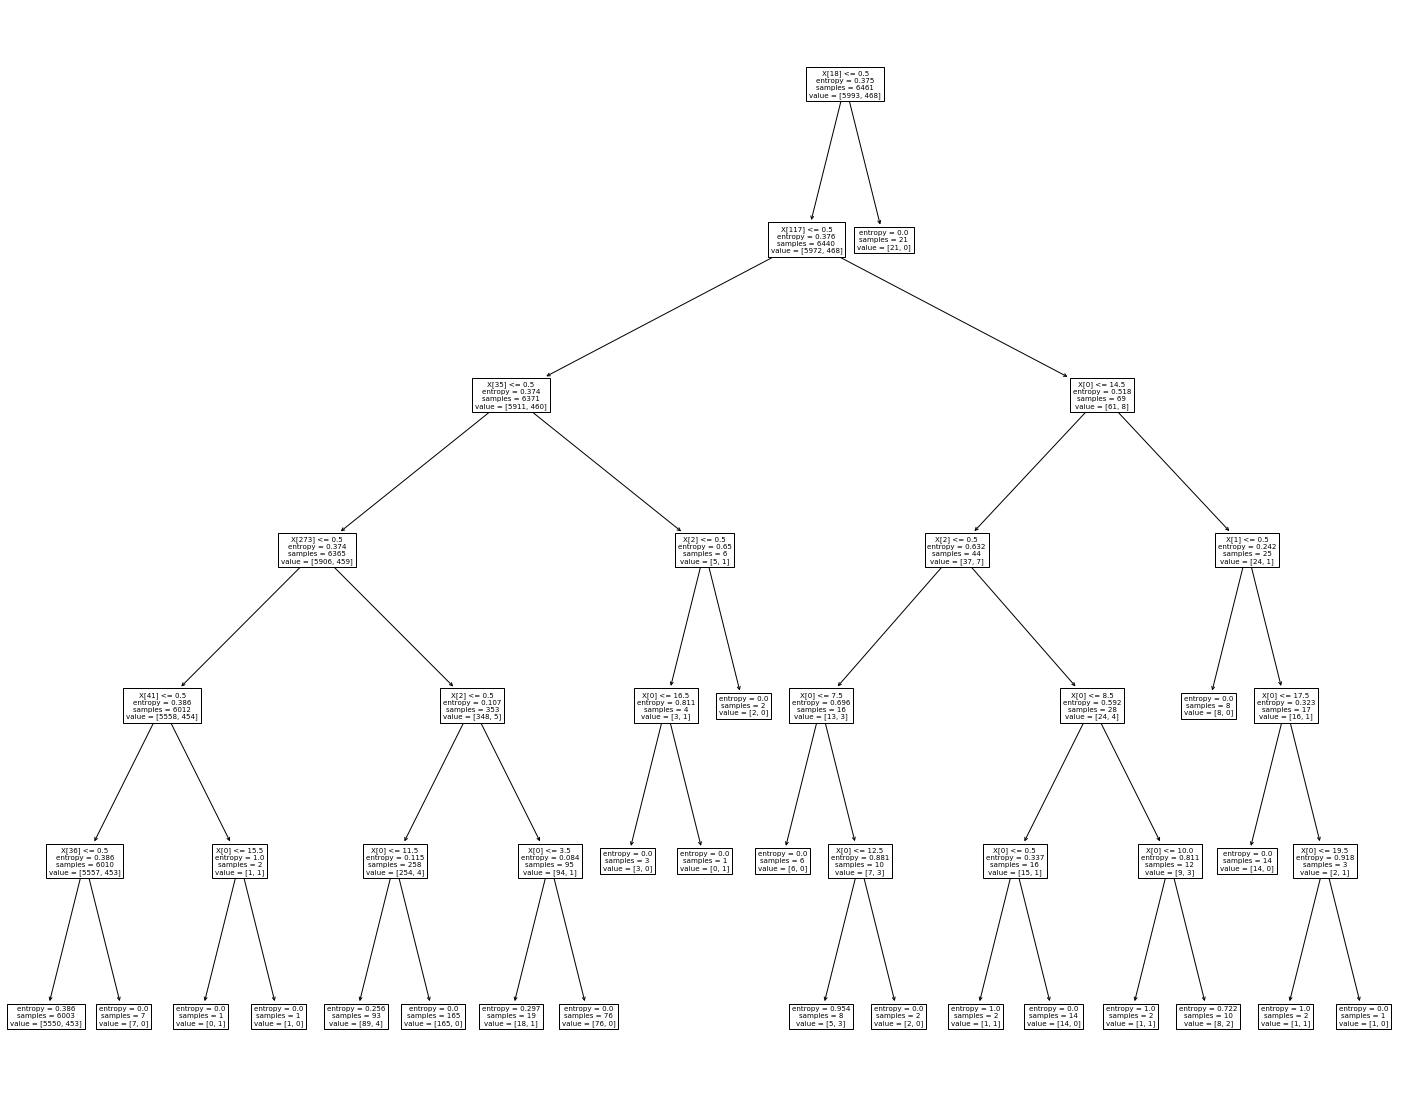

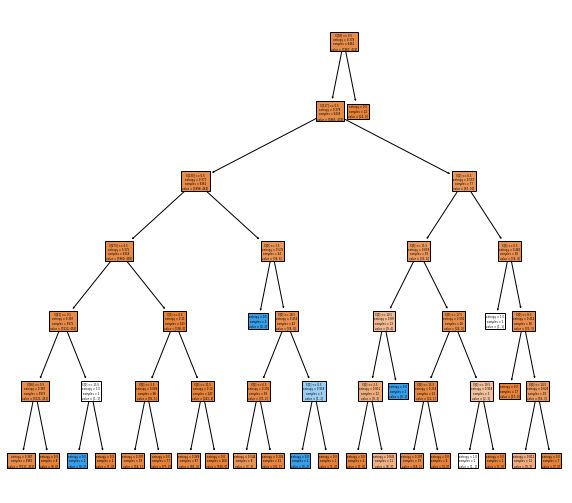

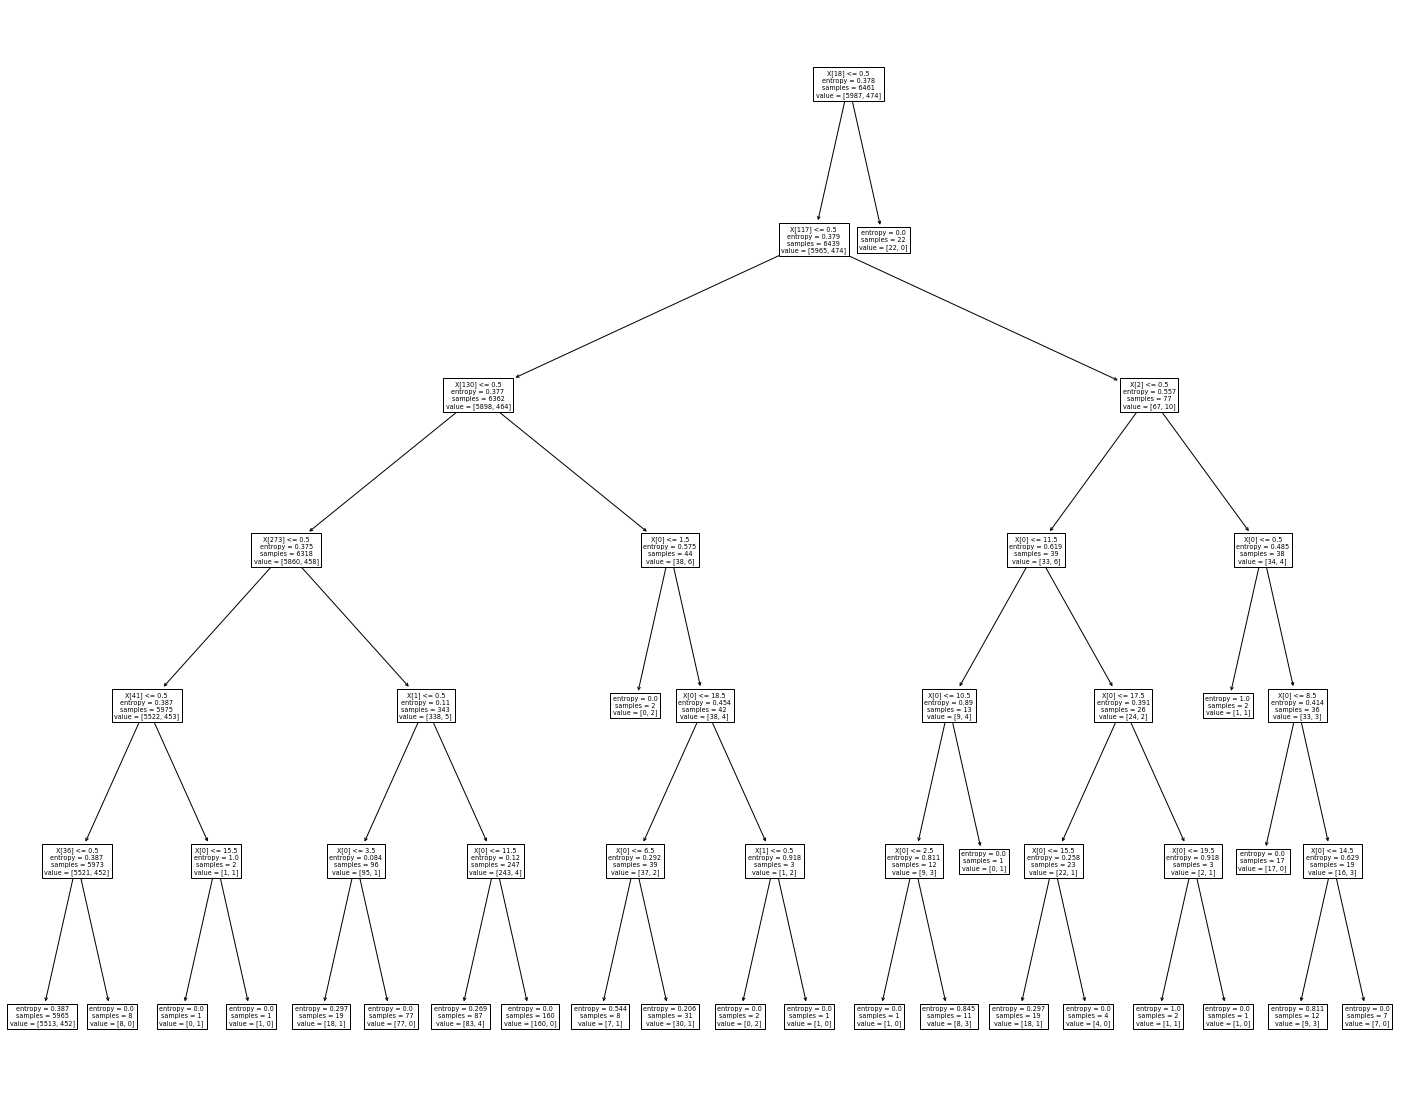

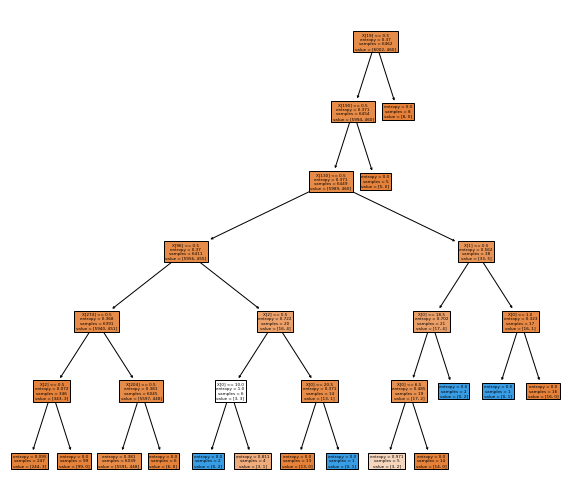

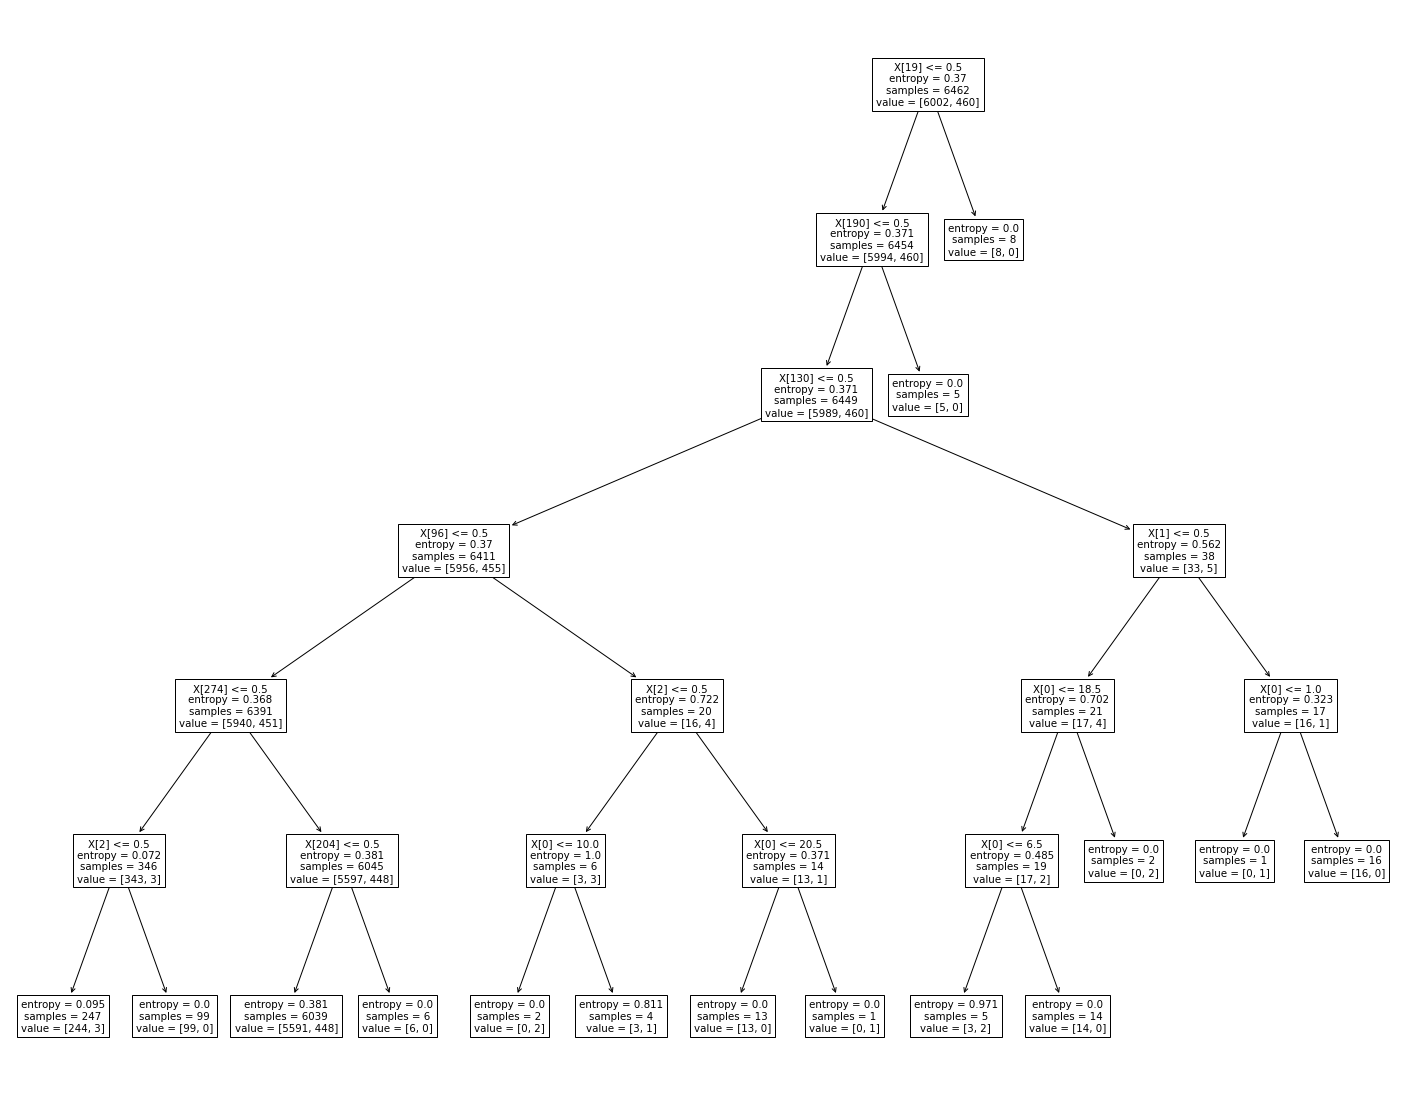

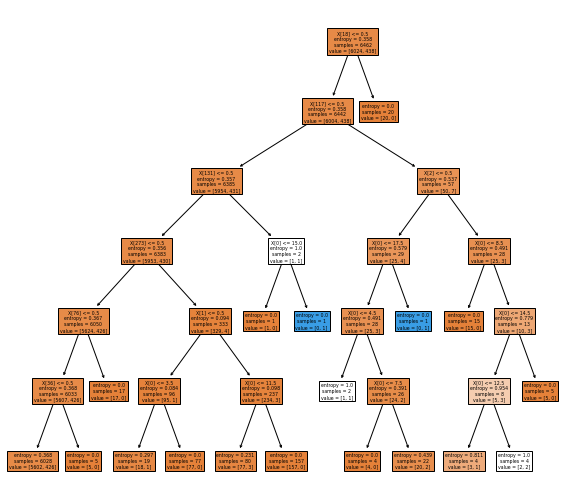

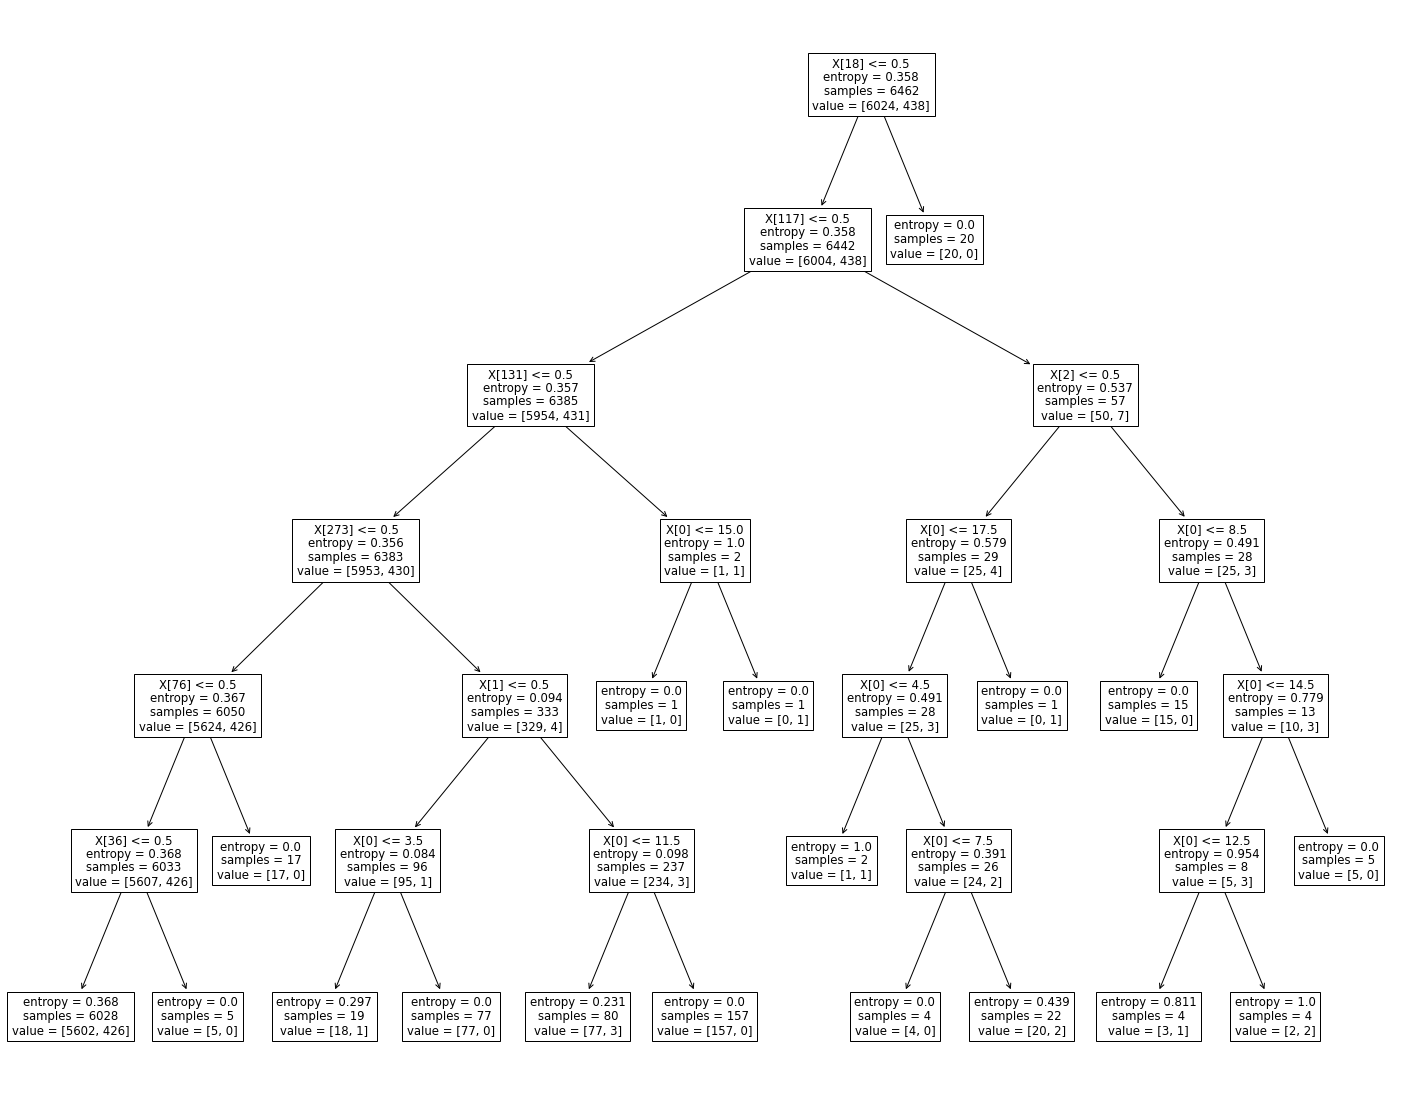

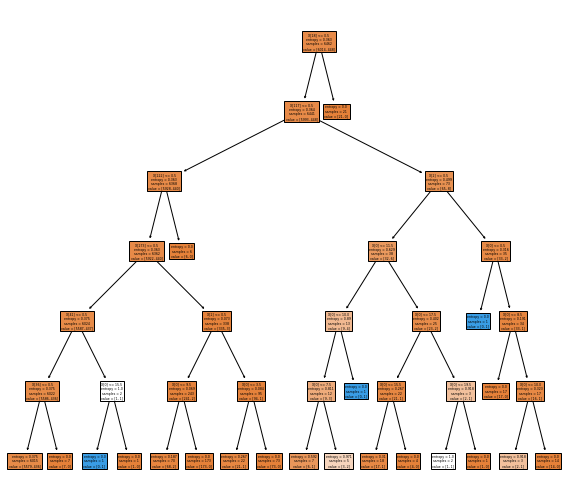

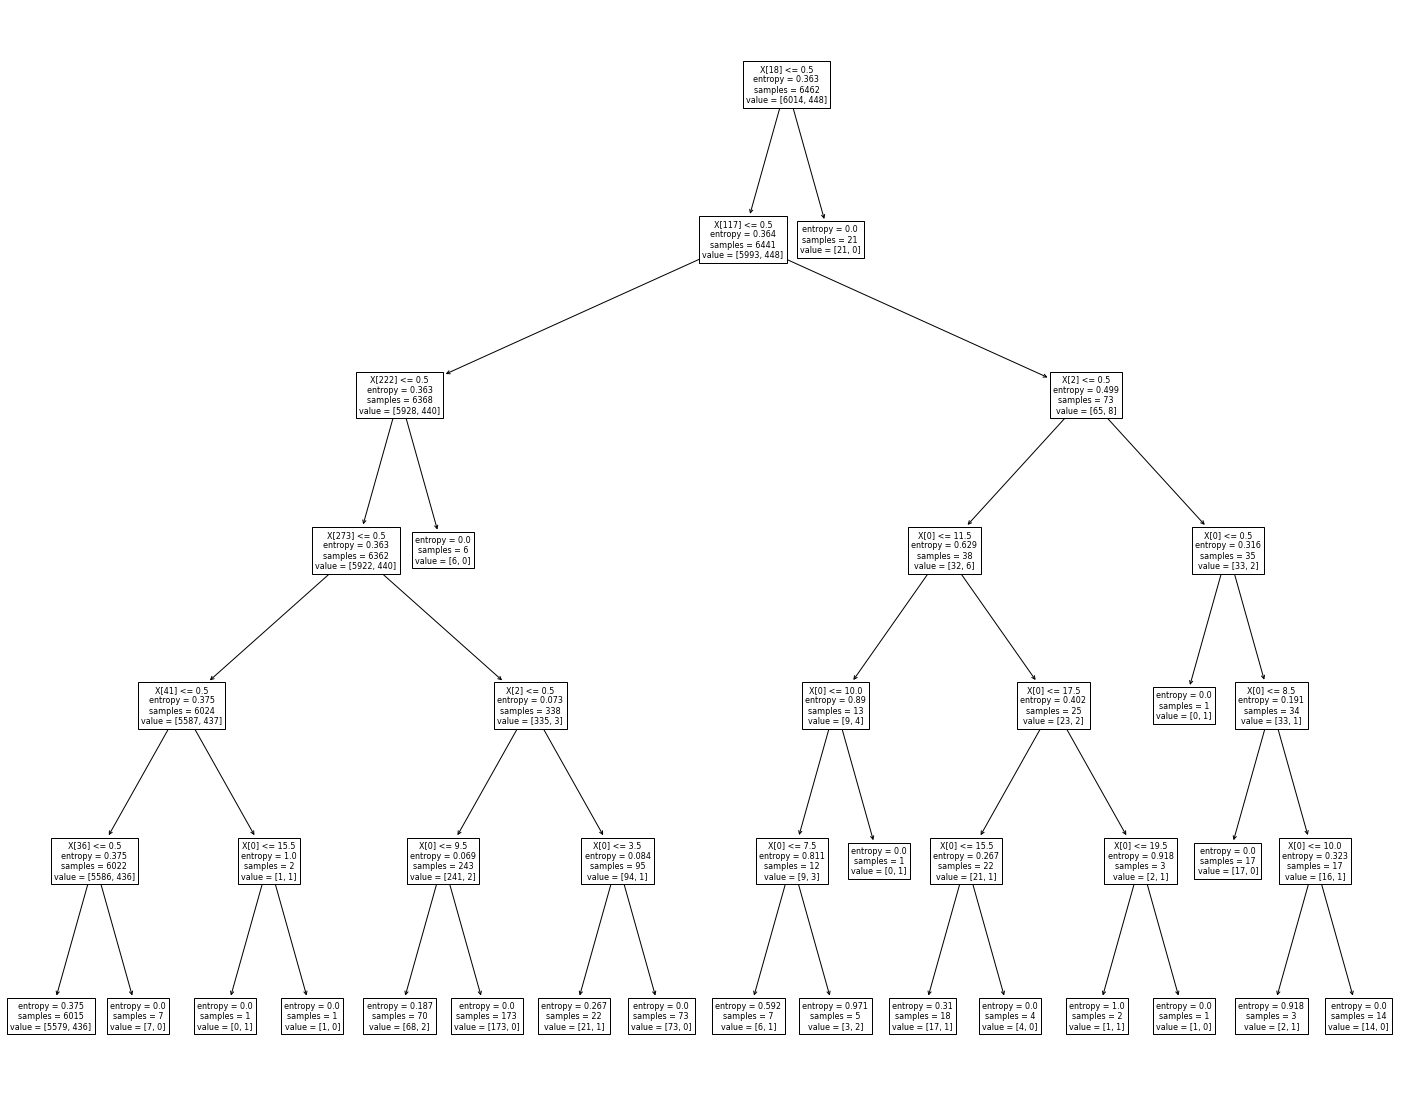

In [14]:
#
dtInstance.KFoldDataSplit(6,5,6)

### Logistic Regressor

In [15]:
lrInstance=LR(pData)
lrInstance.trainModel()

Splitting data..
Fitting Logistic Regressor to the data
Accuray 0.9368811881188119 ----- precision 0.8799949697571987,-----f1 score 0.9075475279157309 


In [16]:
#applying KFold to the model
lrInstance.KFoldDataSplit()

Scaling data.. 
 
Applying 5 fold cross validation
Train: [1616 1617 1618 ... 8074 8075 8076] Validation: [   0    1    2 ... 1613 1614 1615]
Training and spliting data.. fold number 1 

Accuracy for split 1 ----,0.9344059405940595 ----- precision 0.8753542640509404,-----f1 score 0.9039166872541381 

Train: [   0    1    2 ... 8074 8075 8076] Validation: [1616 1617 1618 ... 3229 3230 3231]
Training and spliting data.. fold number 2 

Accuracy for split 2 ----,0.9375 ----- precision 0.8822845629262245,-----f1 score 0.9090546151389333 

Train: [   0    1    2 ... 8074 8075 8076] Validation: [3232 3233 3234 ... 4844 4845 4846]
Training and spliting data.. fold number 3 

Accuracy for split 3 ----,0.930030959752322 ----- precision 0.8660697227433333,-----f1 score 0.8969114741788514 

Train: [   0    1    2 ... 8074 8075 8076] Validation: [4847 4848 4849 ... 6459 6460 6461]
Training and spliting data.. fold number 4 

Accuracy for split 4 ----,0.9157894736842105 ----- precision 0.8408457597

### Browser Data

## Decision Tree

In [17]:
dtInstance=DT(browserData)
bData=dtInstance.cleancolumns(['experiment','device_make','browser'])

Getting dataset
Creating features
Done..


In [18]:
#we split data in the following ratio 70% train 20% validation and 10 % test
dtInstance=DT(bData)
X_train,X_test,y_train,y_test,X_val,y_val=dtInstance.splitData()

Spliting data into train,test samples
Fitting transformer
Done..


In [19]:
print("Training Sample size {} --- Test Sample Size {} --- Validation Sample Size {} ".format((len(X_train)/len(bData)*100),(len(X_test)/len(bData)*100),(len(X_val)/len(bData)*100)))

Training Sample size 71.99455243283397 --- Test Sample Size 10.003714250340472 --- Validation Sample Size 18.001733316825554 


Applying 5 fold cross validation
Training and spliting data.. fold number 1 
Train: [1616 1617 1618 ... 8074 8075 8076] Validation: [   0    1    2 ... 1613 1614 1615]
Training and spliting data.. fold number 1 
Accuray for split 1 ----,0.9356435643564357 ----- precision 0.9356435643564357,-----f1 score 0.9667519181585678 
Train: [   0    1    2 ... 8074 8075 8076] Validation: [1616 1617 1618 ... 3229 3230 3231]
Training and spliting data.. fold number 2 
Accuray for split 2 ----,0.9393564356435643 ----- precision 0.9393564356435642,-----f1 score 0.9687300574345883 
Train: [   0    1    2 ... 8074 8075 8076] Validation: [3232 3233 3234 ... 4844 4845 4846]
Training and spliting data.. fold number 3 
Accuray for split 3 ----,0.9306501547987616 ----- precision 0.9306501547987617,-----f1 score 0.9640795381654906 
Train: [   0    1    2 ... 8074 8075 8076] Validation: [4847 4848 4849 ... 6459 6460 6461]
Training and spliting data.. fold number 4 
Accuray for split 4 ----,0.9164086687306502 

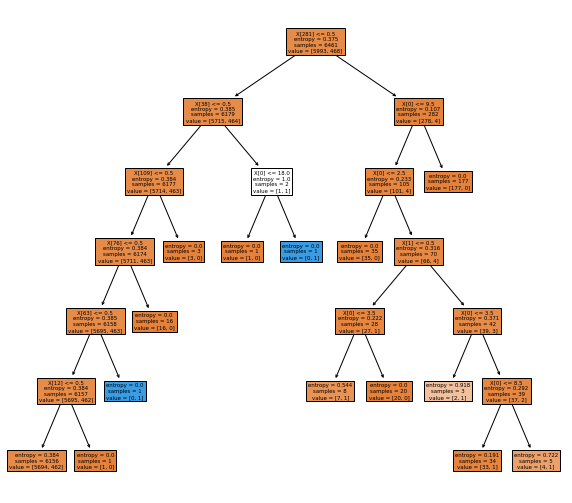

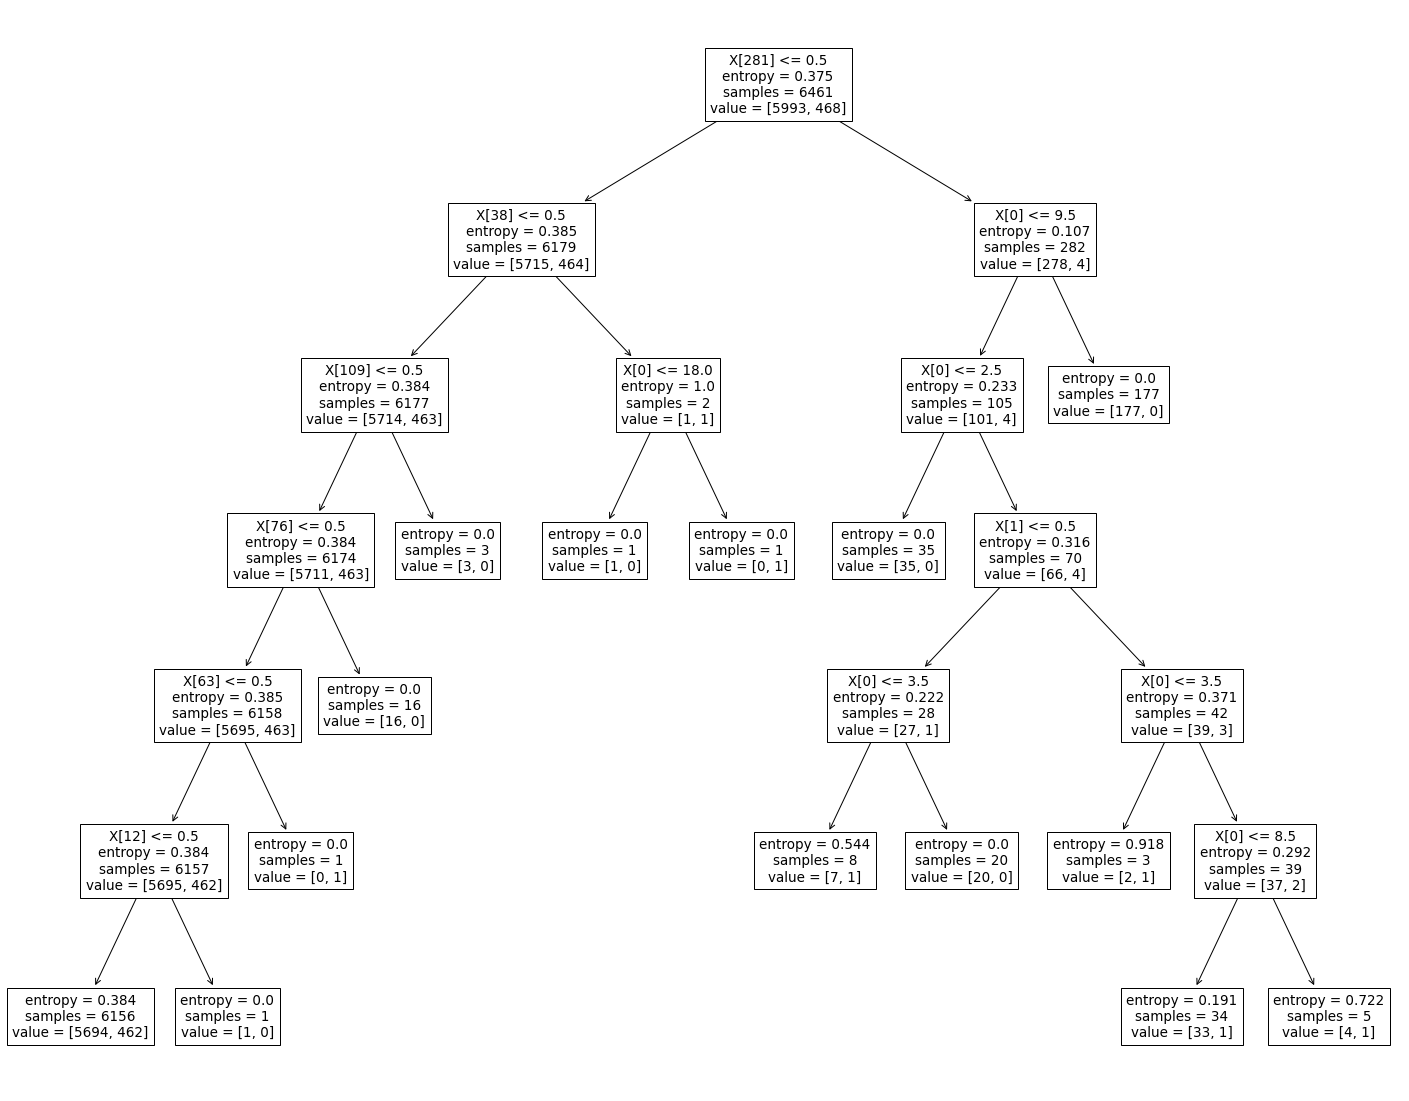

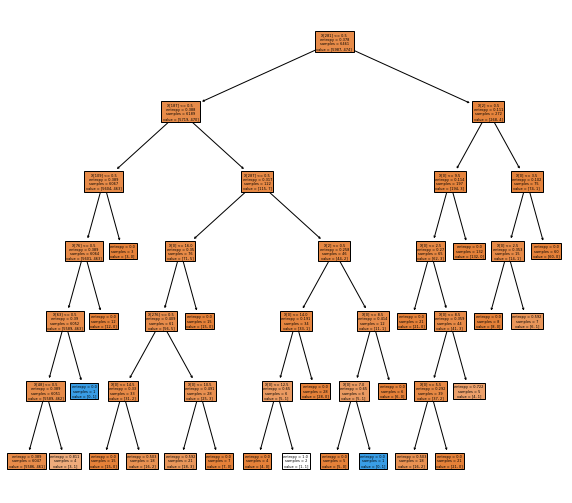

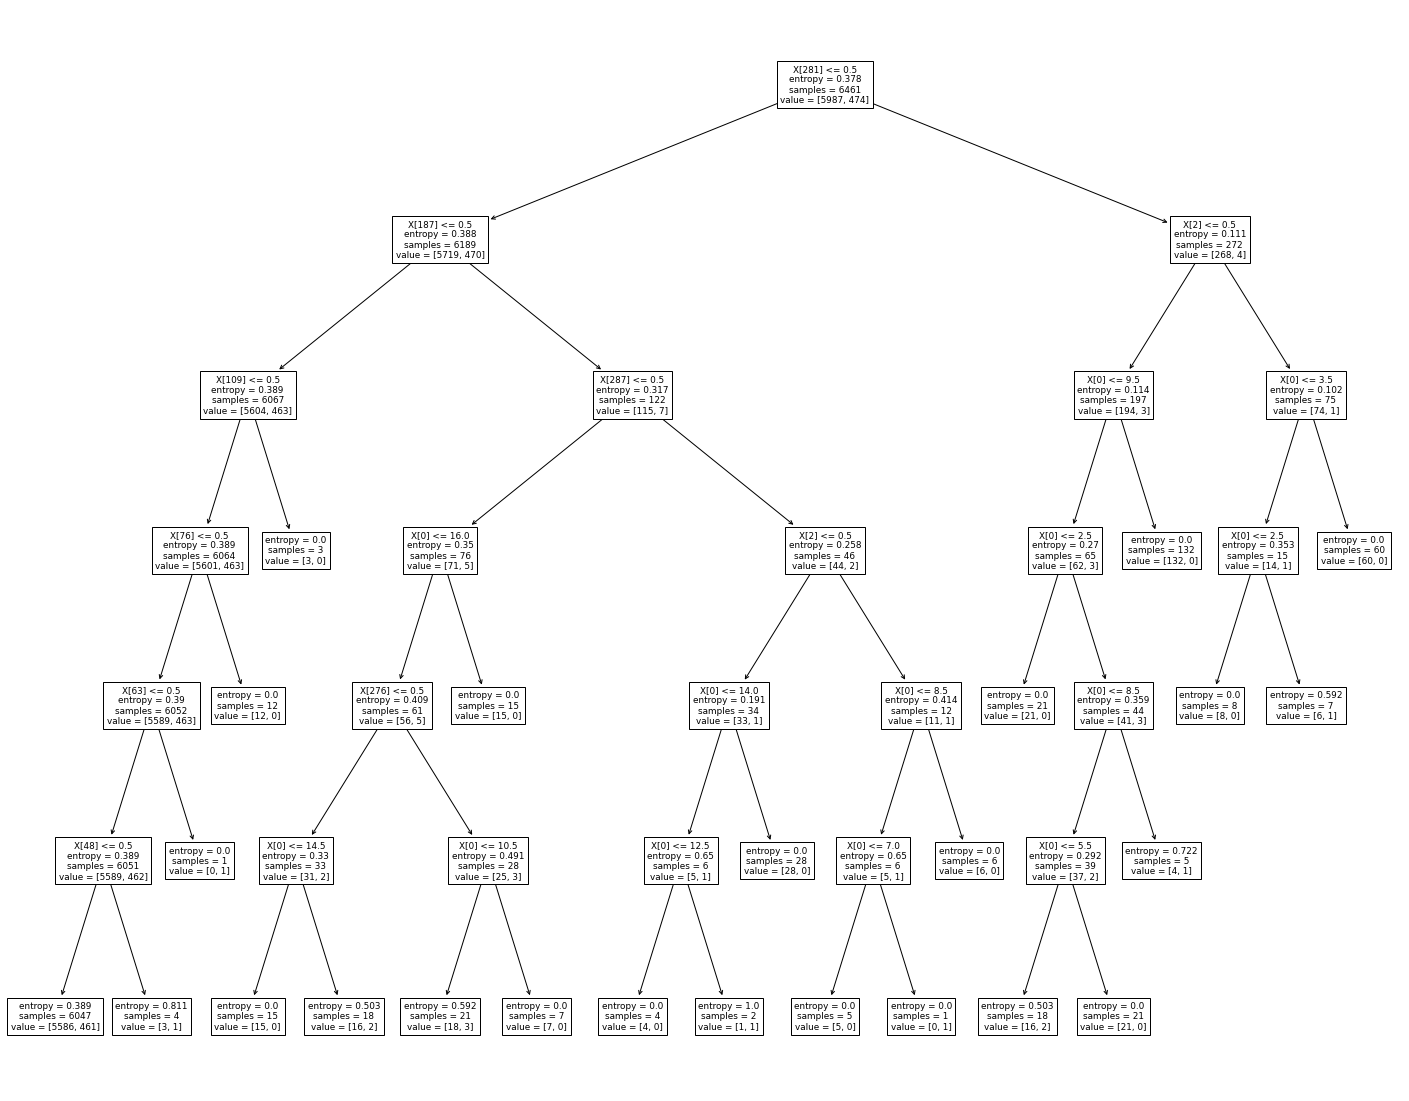

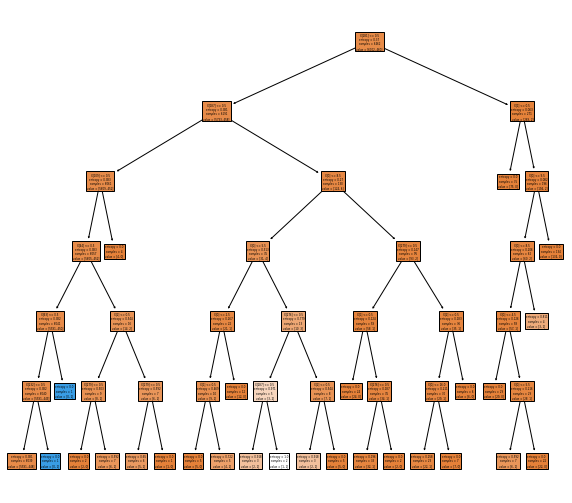

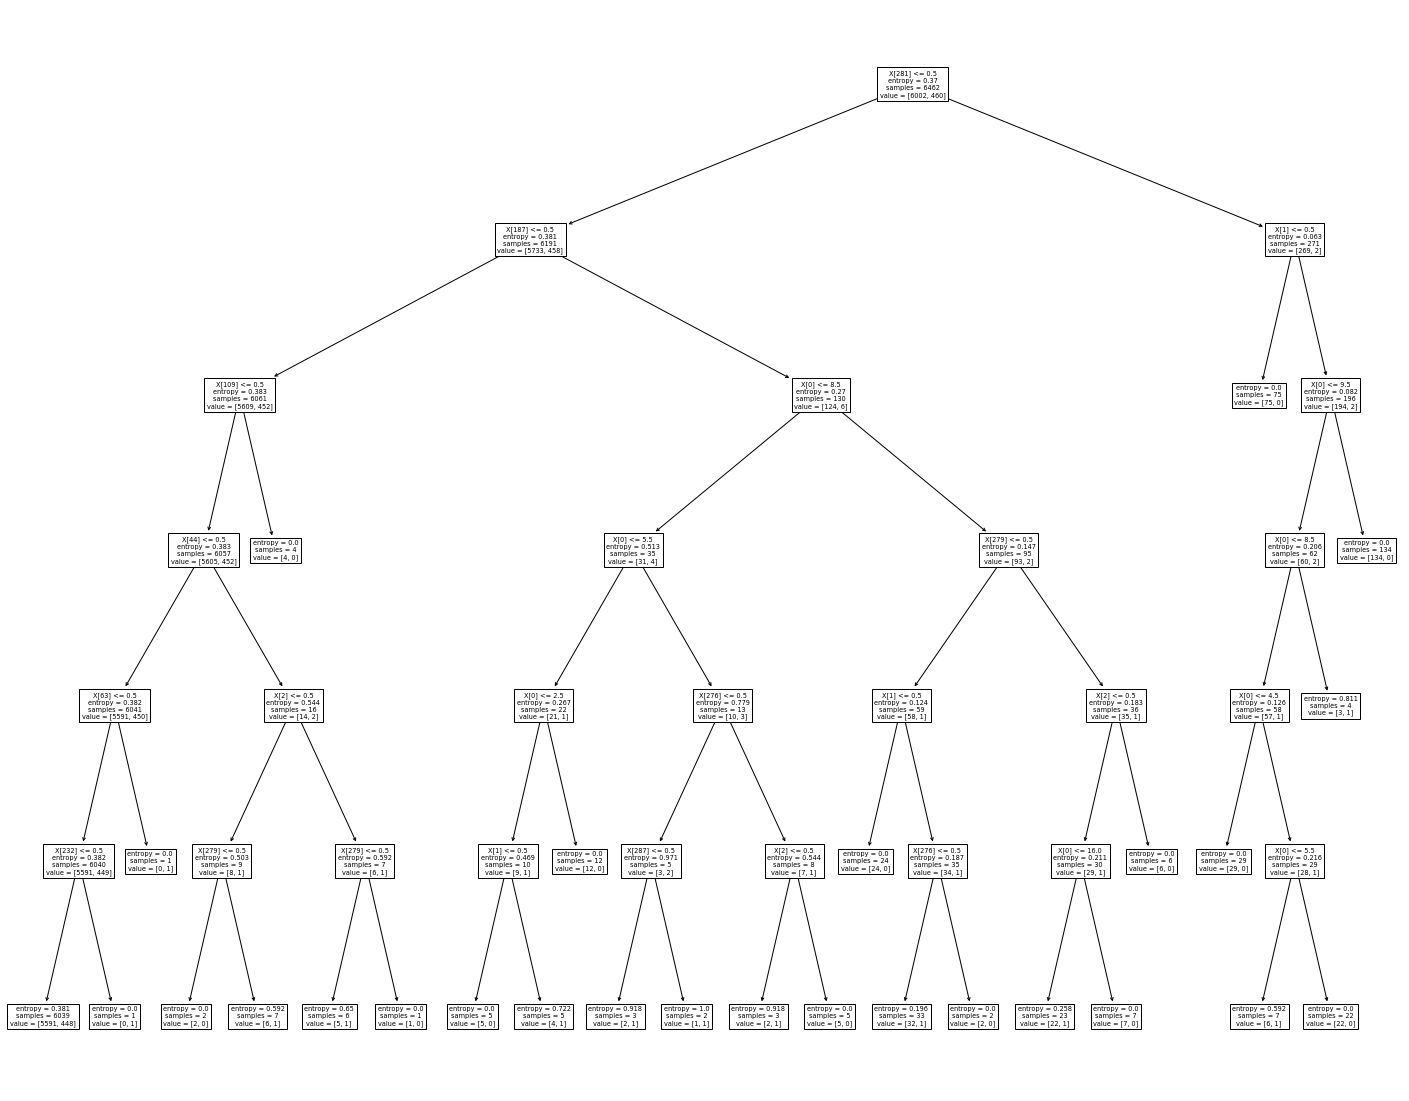

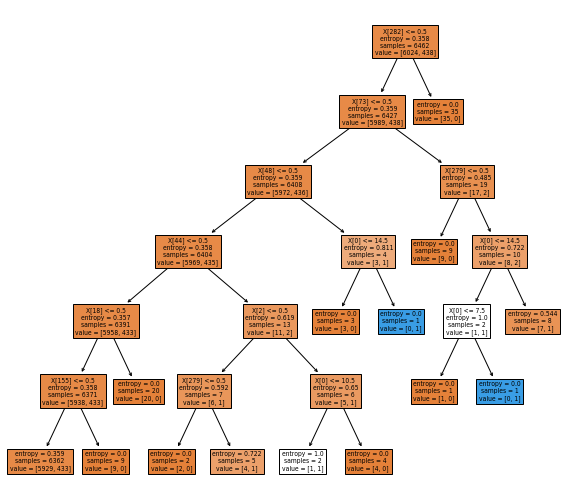

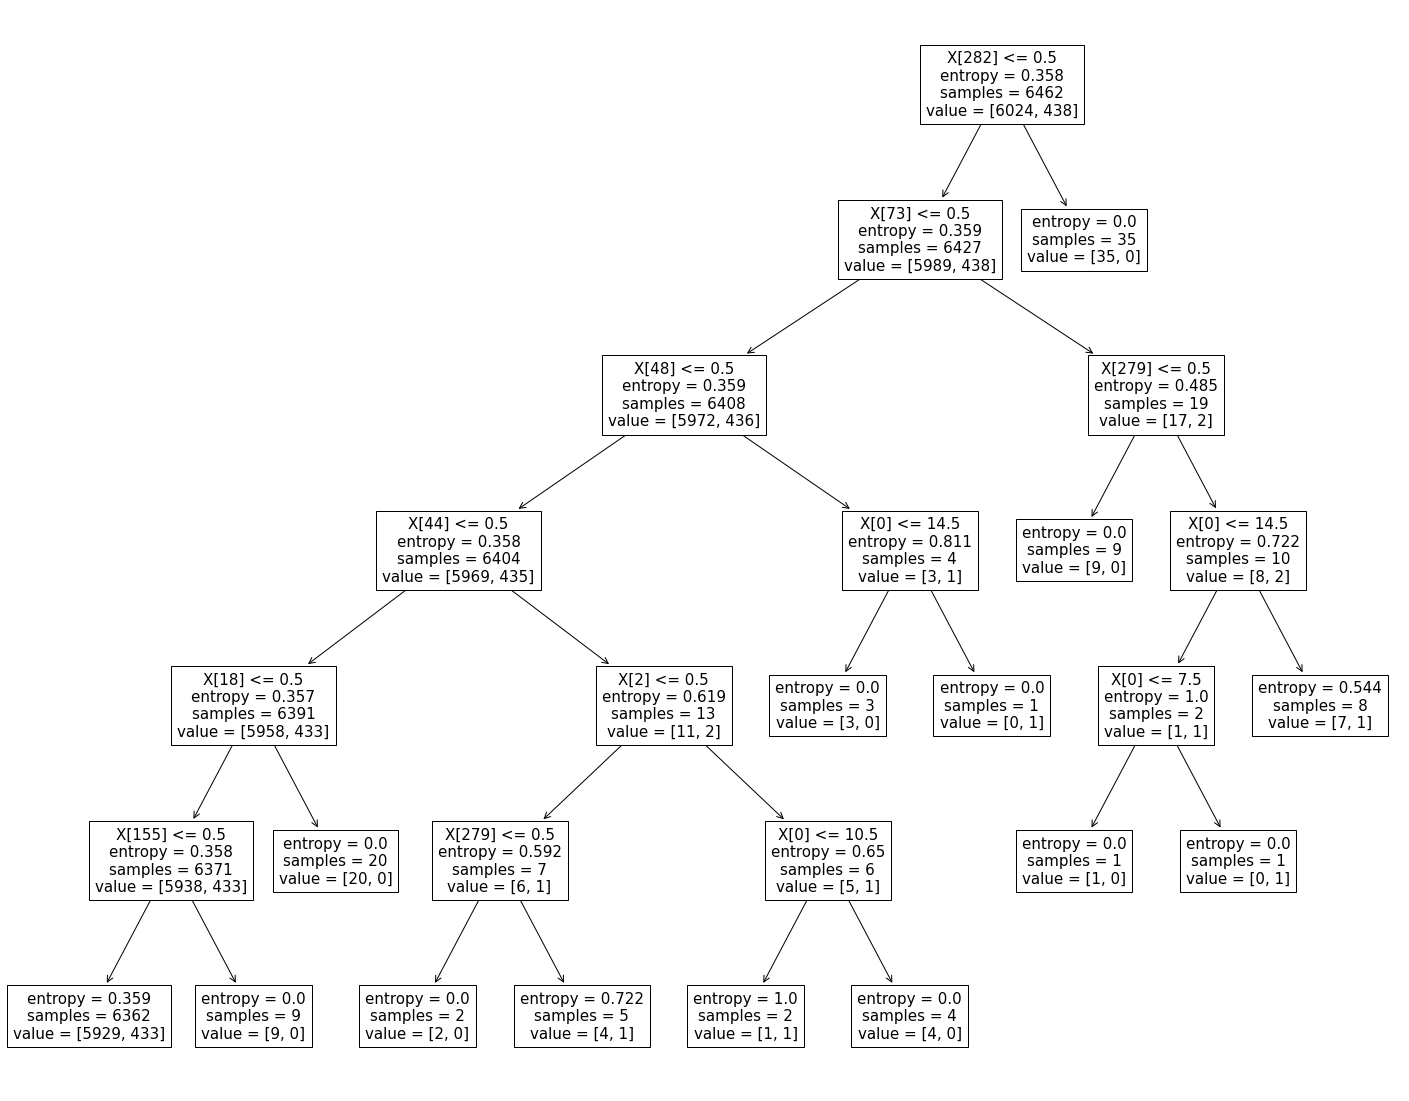

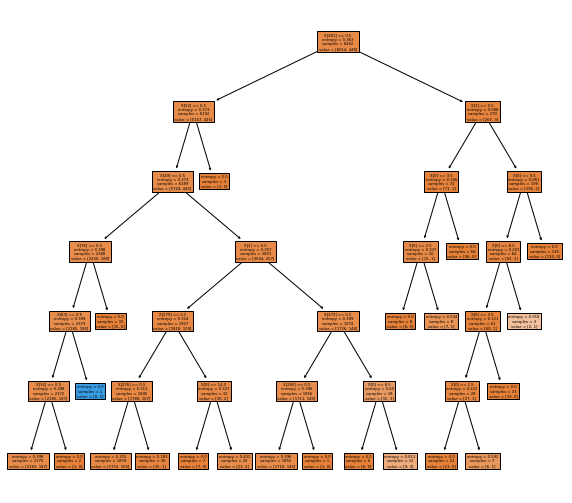

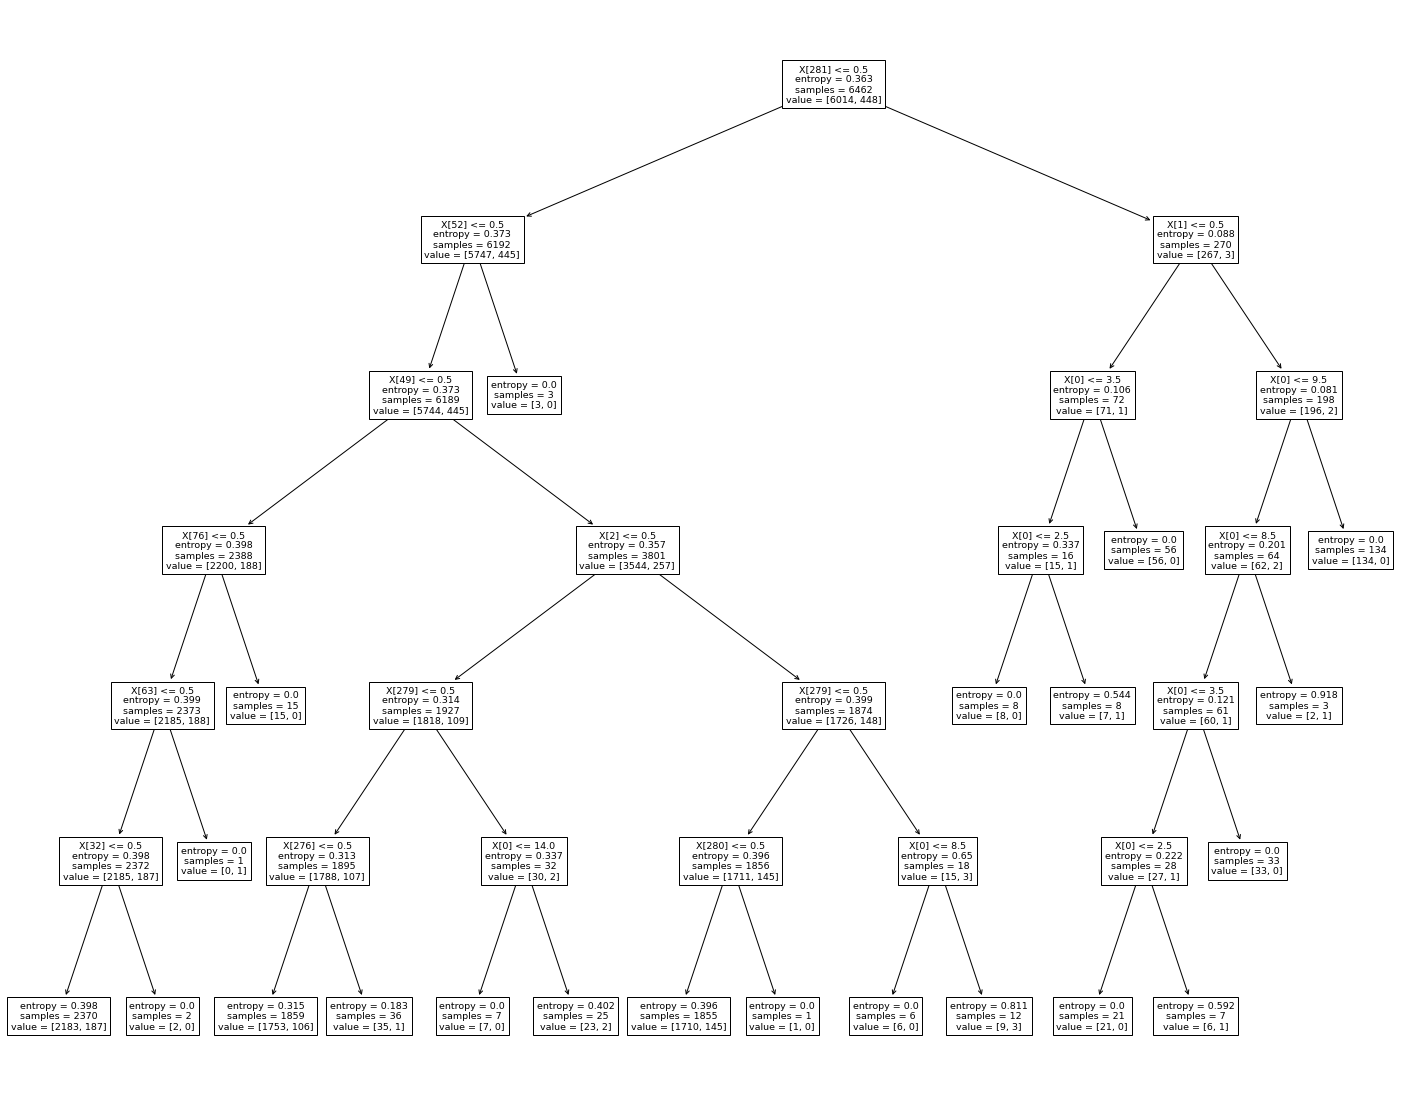

In [20]:
dtInstance.KFoldDataSplit(6,5,6)

## Logistic Regression

In [21]:
lrInstance=LR(bData)
lrInstance.trainModel()

Splitting data..
Fitting Logistic Regressor to the data
Accuray 0.9368811881188119 ----- precision 0.8799949697571987,-----f1 score 0.9075475279157309 


In [22]:
#applying KFold to the model
lrInstance.KFoldDataSplit()

Scaling data.. 
 
Applying 5 fold cross validation
Train: [1616 1617 1618 ... 8074 8075 8076] Validation: [   0    1    2 ... 1613 1614 1615]
Training and spliting data.. fold number 1 

Accuracy for split 1 ----,0.9344059405940595 ----- precision 0.8753542640509404,-----f1 score 0.9039166872541381 

Train: [   0    1    2 ... 8074 8075 8076] Validation: [1616 1617 1618 ... 3229 3230 3231]
Training and spliting data.. fold number 2 

Accuracy for split 2 ----,0.9375 ----- precision 0.8822845629262245,-----f1 score 0.9090546151389333 

Train: [   0    1    2 ... 8074 8075 8076] Validation: [3232 3233 3234 ... 4844 4845 4846]
Training and spliting data.. fold number 3 

Accuracy for split 3 ----,0.930030959752322 ----- precision 0.8660697227433333,-----f1 score 0.8969114741788514 

Train: [   0    1    2 ... 8074 8075 8076] Validation: [4847 4848 4849 ... 6459 6460 6461]
Training and spliting data.. fold number 4 

Accuracy for split 4 ----,0.9157894736842105 ----- precision 0.8408457597

## Hyper-Parameter Tuning

### Platform Data

#### Decision Tree hyperParameter Tuning

In [23]:
lrInstance=LR(pData)
dtInstance=DT(pData)

Spliting data into train,test samples
Fitting transformer
Done..
Training and logging to mlflow
Current Parameters: Max_Depth 5 ---- Min_Sample_splits 3 ---- max_features 5 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 

Training and logging to mlflow
Current Parameters: Max_Depth 5 ---- Min_Sample_splits 3 ---- max_features 7 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 

Training and logging to mlflow
Current Parameters: Max_Depth 5 ---- Min_Sample_splits 3 ---- max_features 6 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 

Training and logging to mlflow
Current Parameters: Max_Depth 5 ---- Min_Sample_splits 4 ---- max_features 5 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 

Training and loggin

C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 3 ---- max_features 7 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 3 ---- max_features 6 
Model Metrics: Accuracy   ----0.9368811881188119, ----- precision 0.8799949697571987,-----f1 score 0.9075475279157309 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 4 ---- max_features 5 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 4 ---- max_features 7 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 4 ---- max_features 6 
Model Metrics: Accuracy   ----0.9368811881188119, ----- precision 0.8799949697571987,-----f1 score 0.9075475279157309 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 5 ---- max_features 5 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 5 ---- max_features 7 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 5 ---- max_features 6 
Model Metrics: Accuracy   ----0.9368811881188119, ----- precision 0.8799949697571987,-----f1 score 0.9075475279157309 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


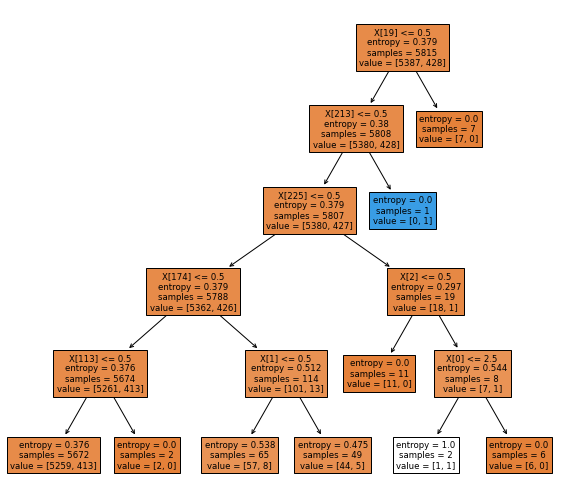

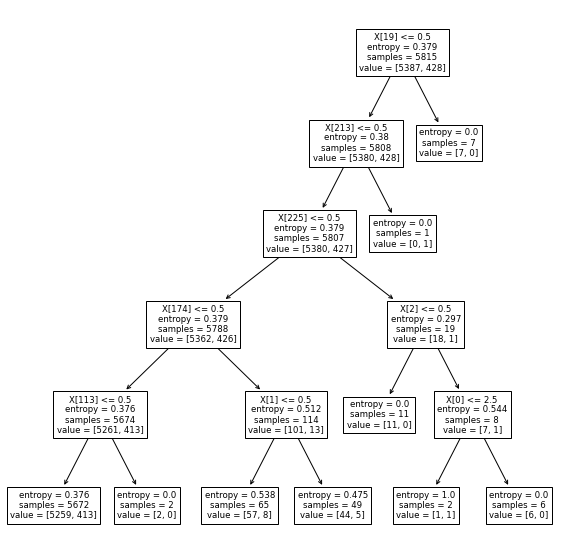

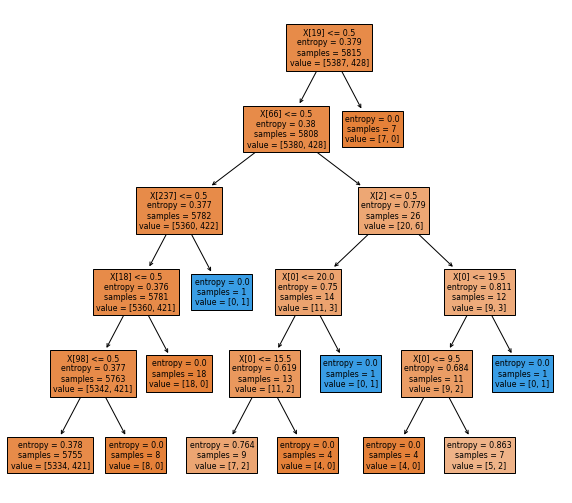

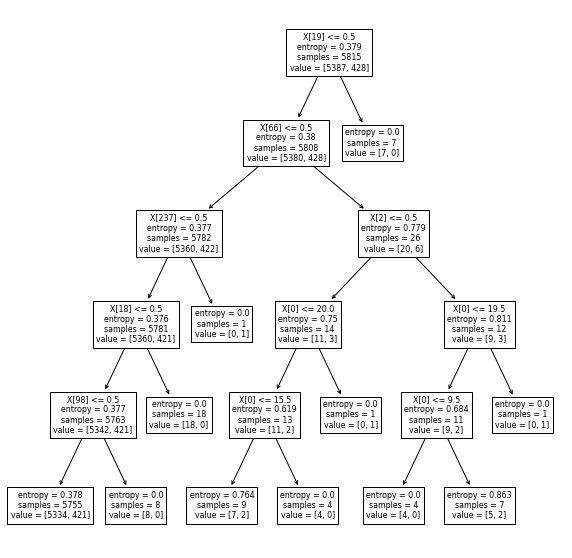

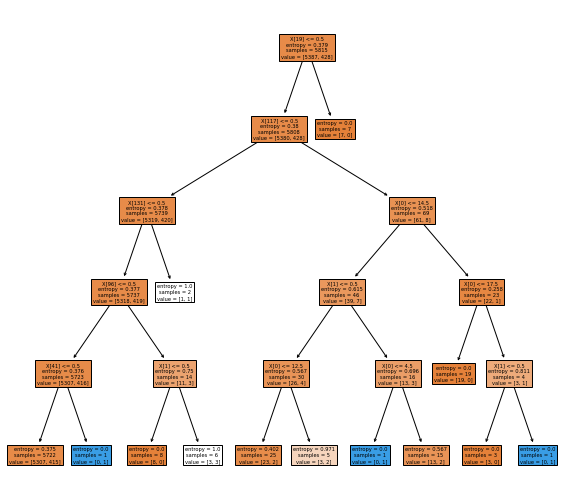

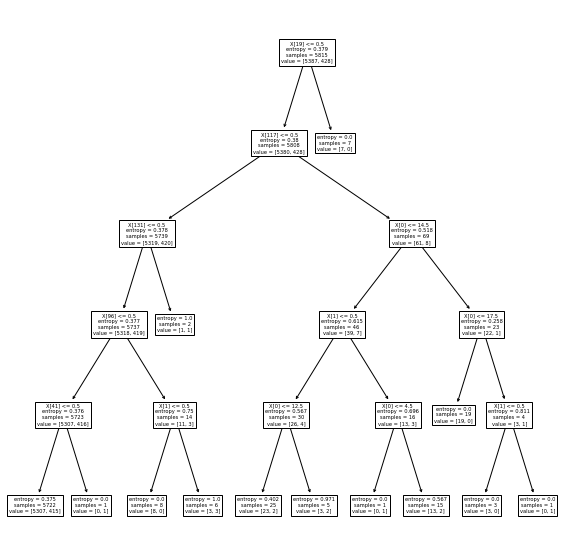

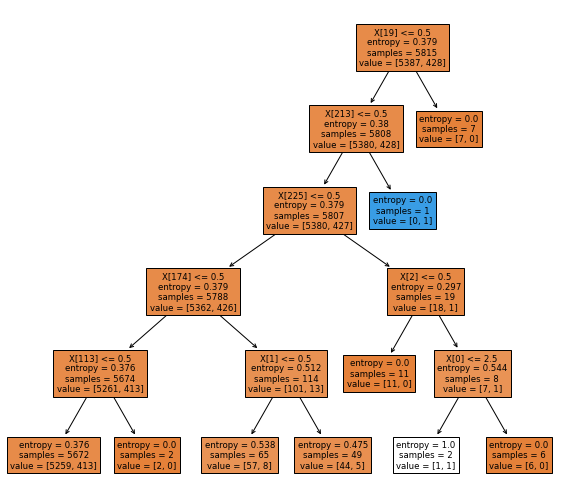

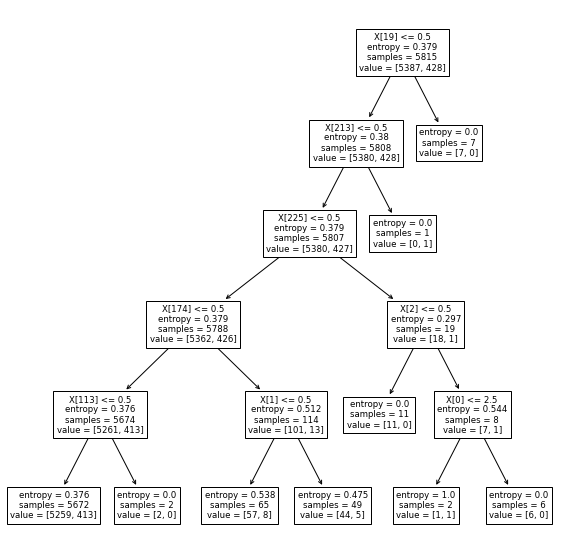

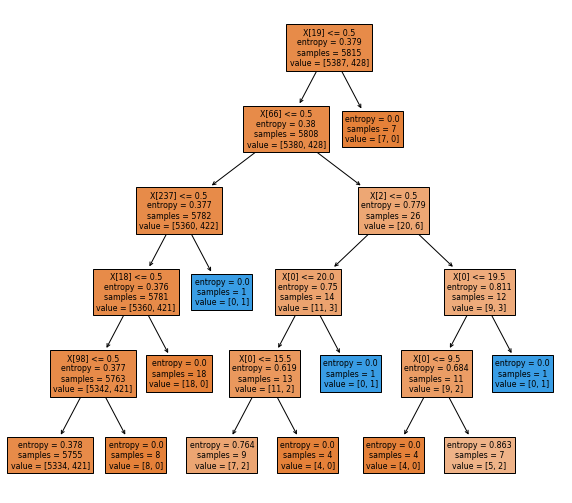

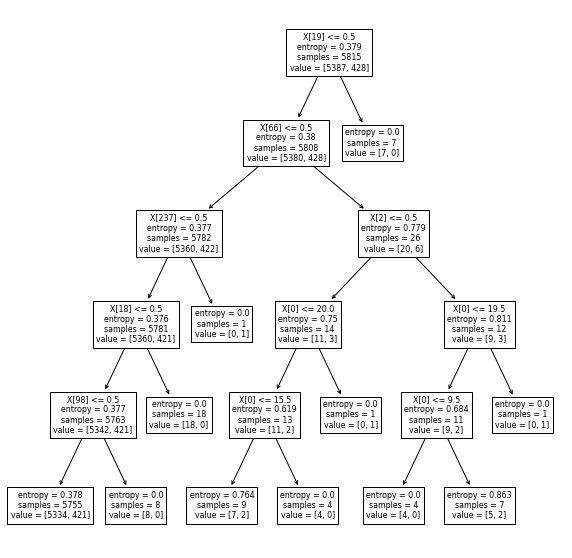

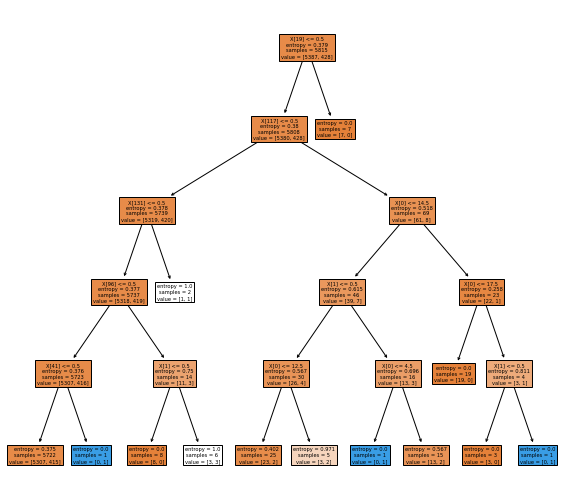

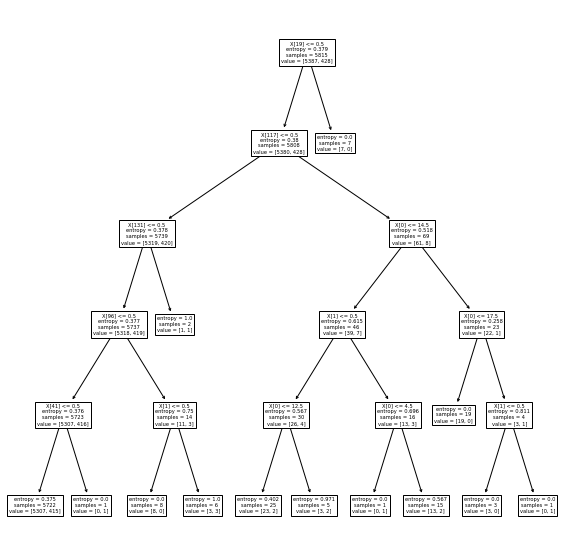

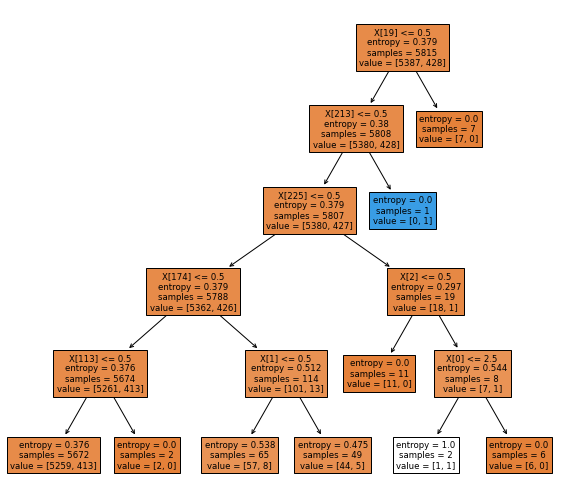

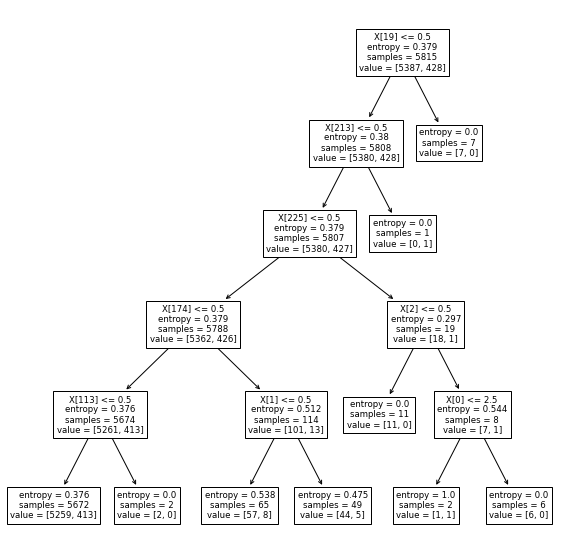

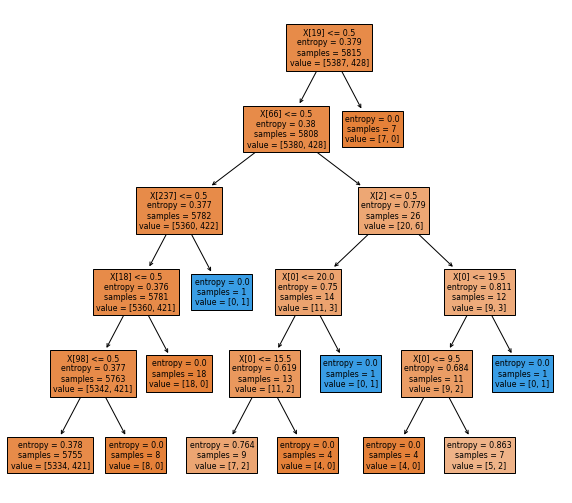

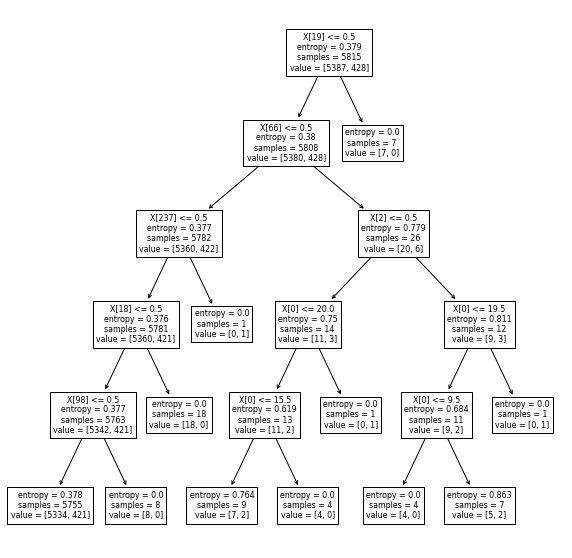

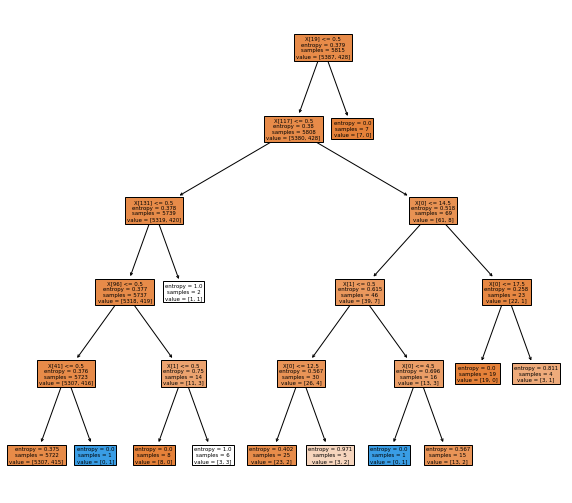

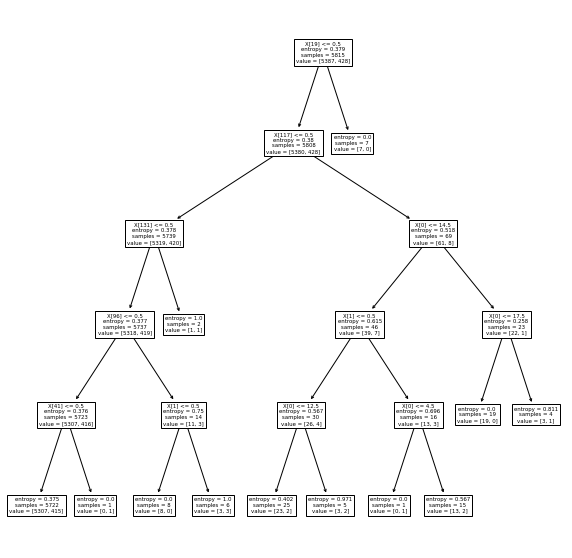

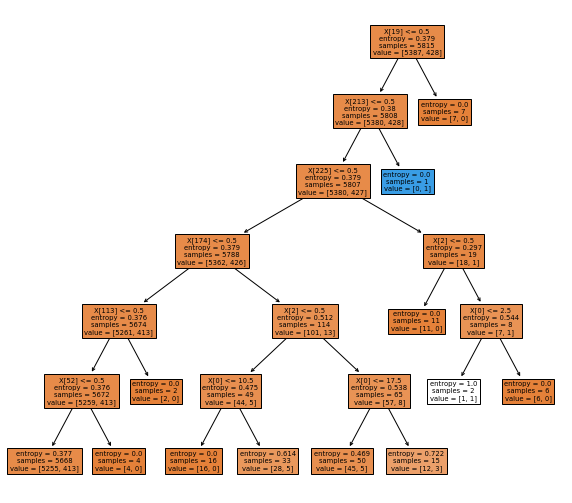

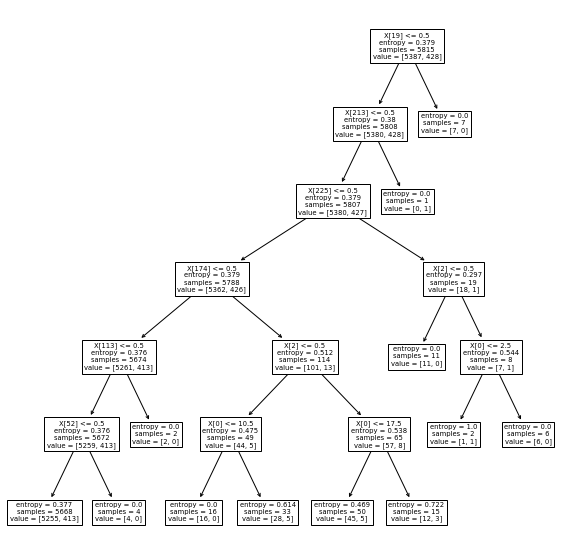

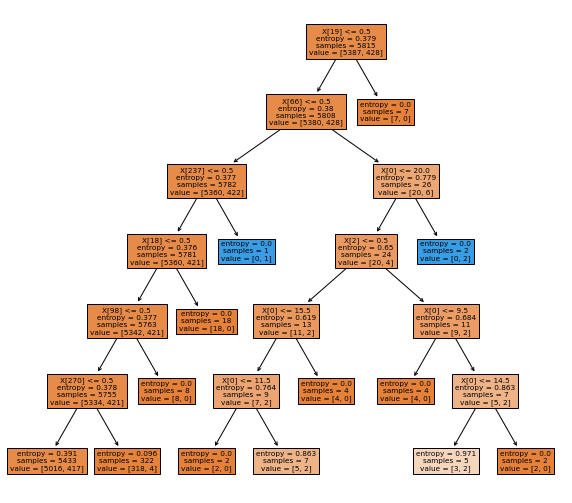

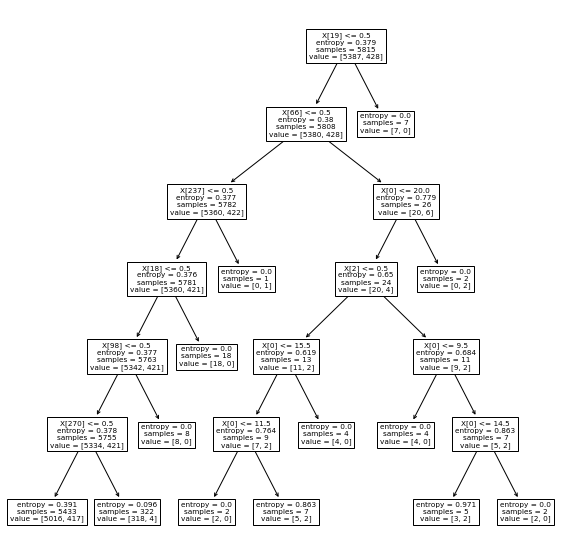

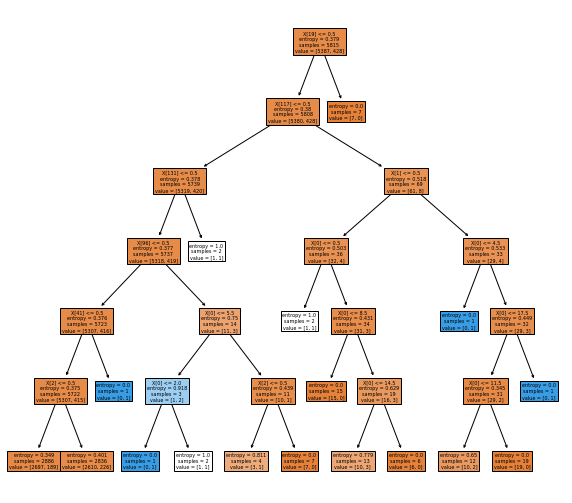

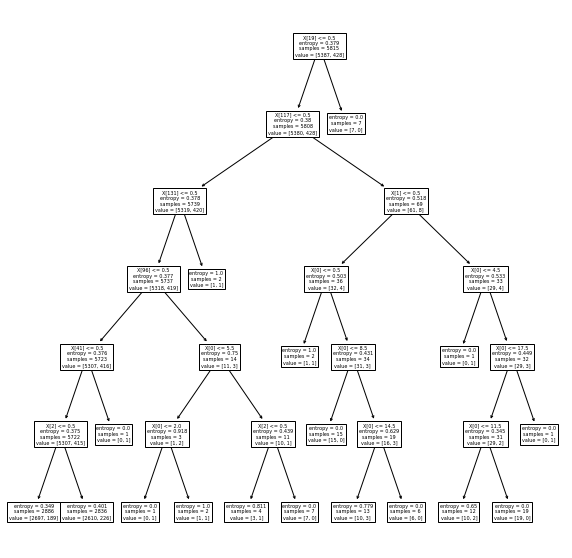

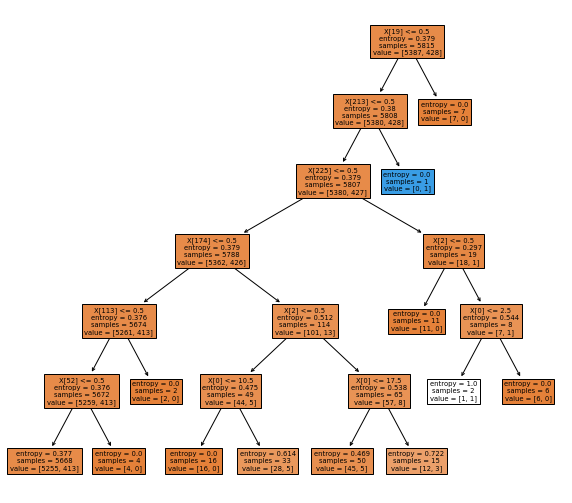

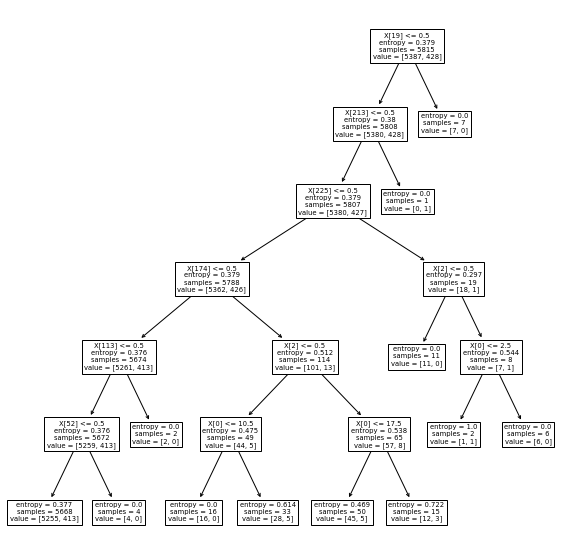

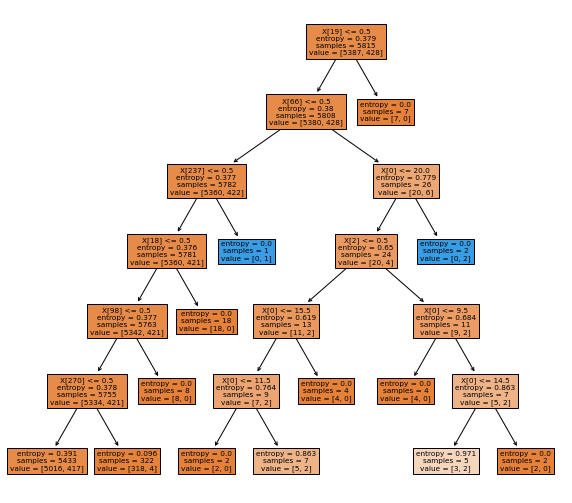

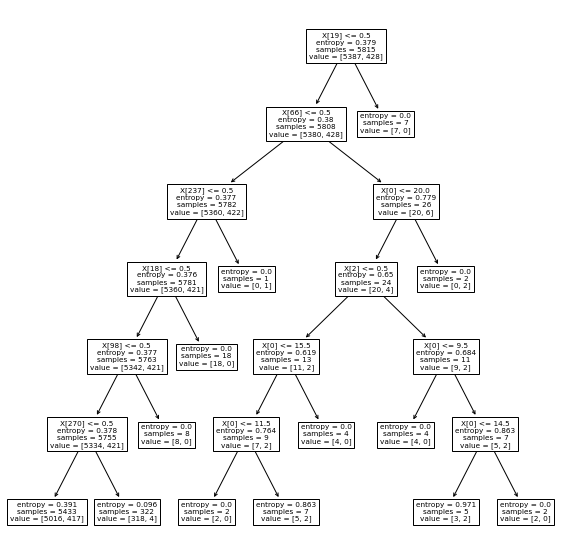

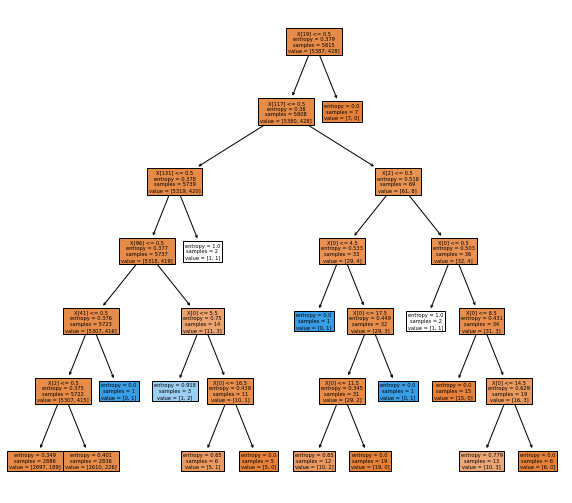

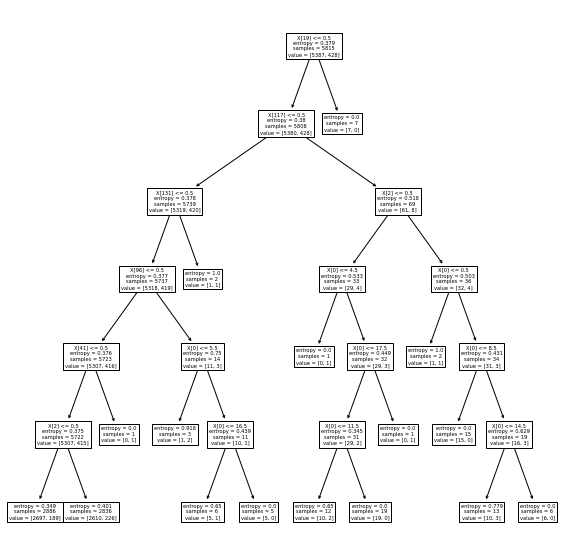

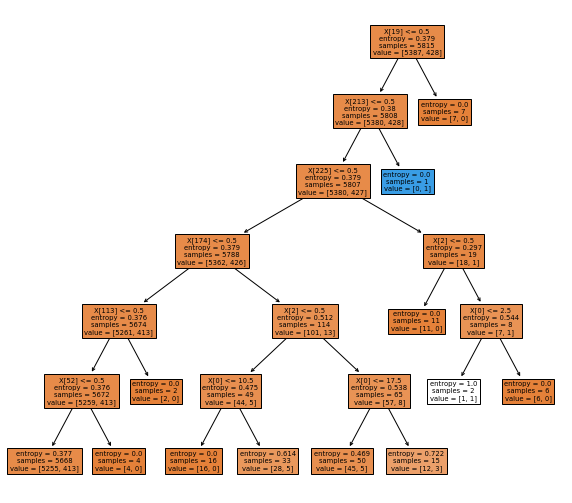

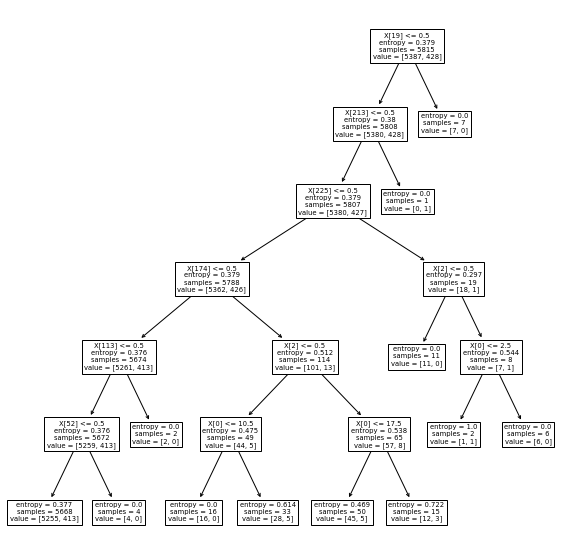

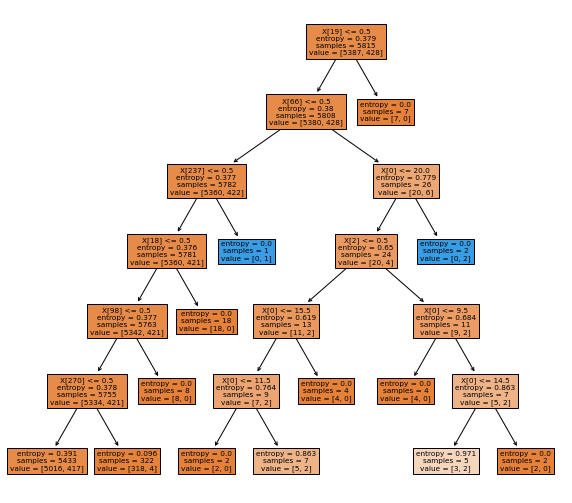

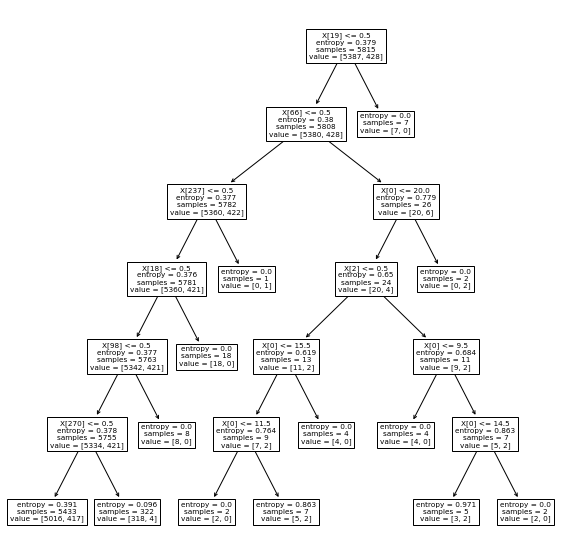

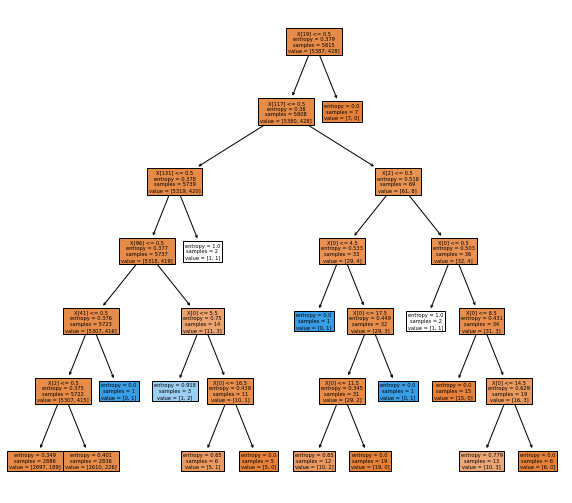

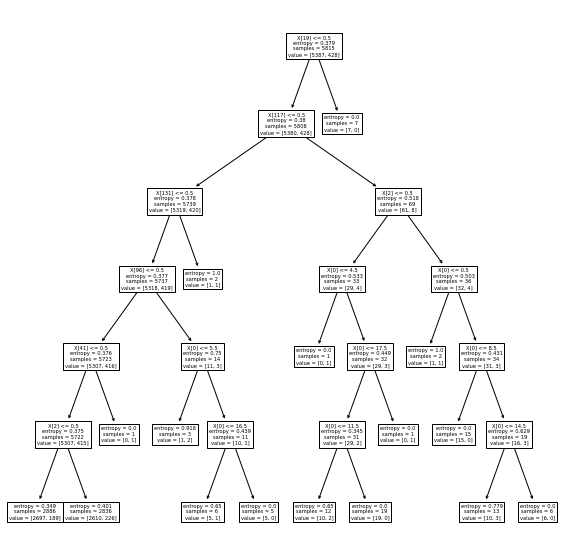

In [24]:
dtInstance.hyperparameterTune()

#### Logistic Regressor Tuning

In [25]:
lrInstance.hyperParamModel()

IndexError: tuple index out of range

## Feature Importance

In [ ]:
featureImp=dtInstance.trainModel(6,4,5)
featureImp.sort_index(ascending=False)

### Browser Data

In [26]:
lrInstance=LR(bData)
dtInstance=DT(bData)

Spliting data into train,test samples
Fitting transformer
Done..
Training and logging to mlflow
Current Parameters: Max_Depth 5 ---- Min_Sample_splits 3 ---- max_features 5 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 

Training and logging to mlflow
Current Parameters: Max_Depth 5 ---- Min_Sample_splits 3 ---- max_features 7 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 

Training and logging to mlflow
Current Parameters: Max_Depth 5 ---- Min_Sample_splits 3 ---- max_features 6 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 

Training and logging to mlflow
Current Parameters: Max_Depth 5 ---- Min_Sample_splits 4 ---- max_features 5 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 

Training and loggin

C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 3 ---- max_features 7 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 3 ---- max_features 6 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 4 ---- max_features 5 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 4 ---- max_features 7 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 4 ---- max_features 6 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 5 ---- max_features 5 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 5 ---- max_features 7 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


Training and logging to mlflow


C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,9))


Current Parameters: Max_Depth 6 ---- Min_Sample_splits 5 ---- max_features 6 
Model Metrics: Accuracy   ----0.9381188118811881, ----- precision 0.9381188118811881,-----f1 score 0.9680715197956575 



C:\Users\blais\Desktop\10-Academy\week3\ABtesting\model\knn.py:292: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


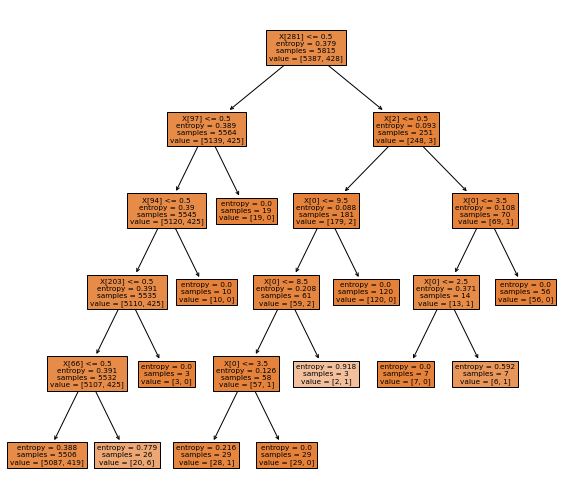

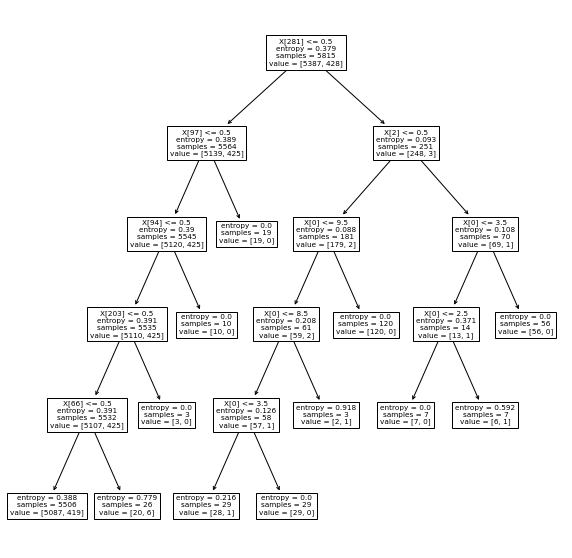

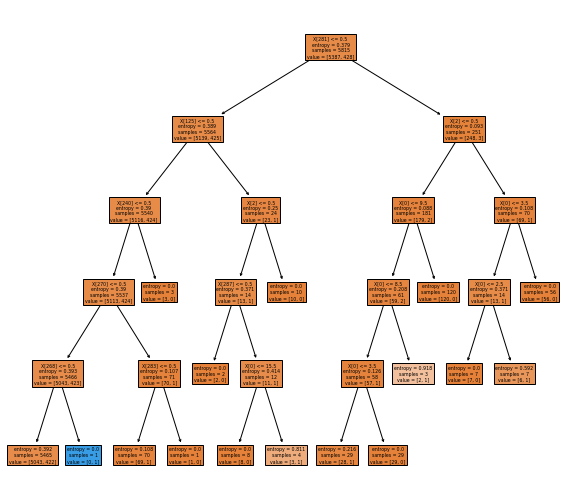

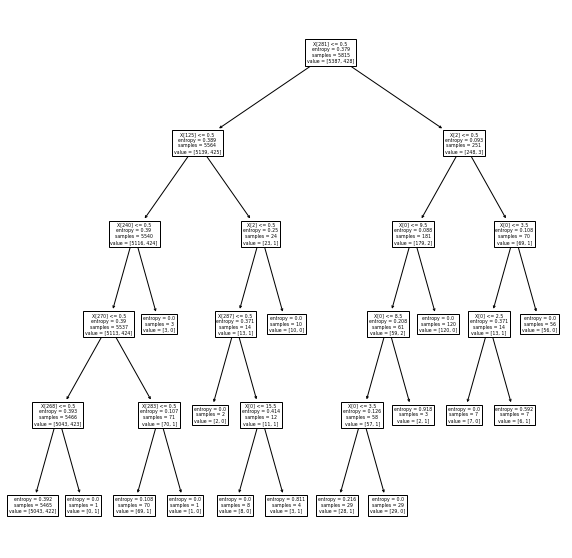

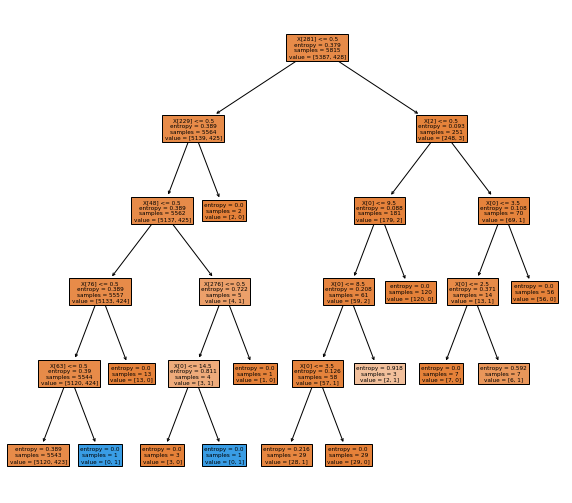

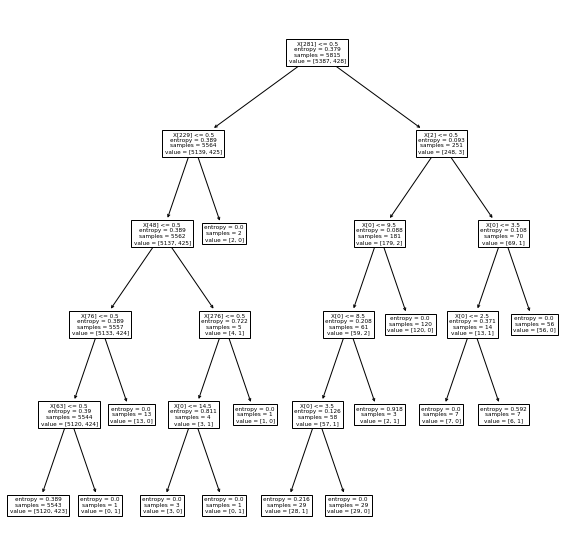

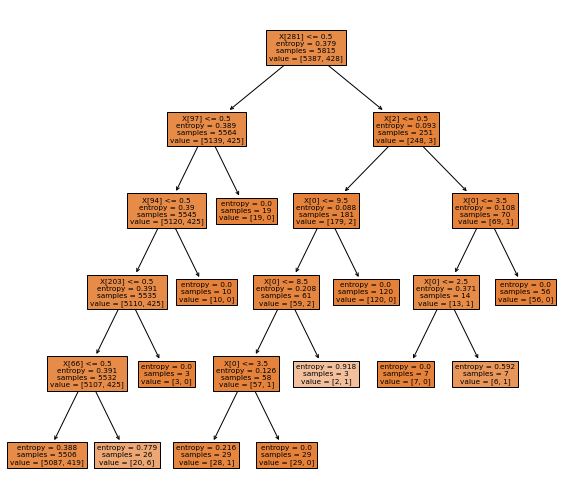

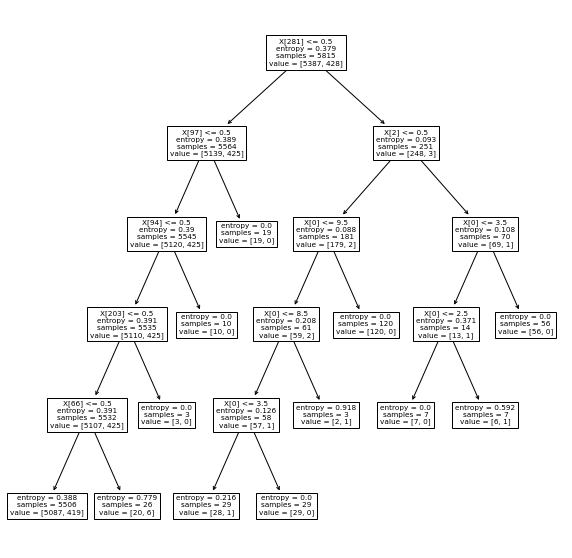

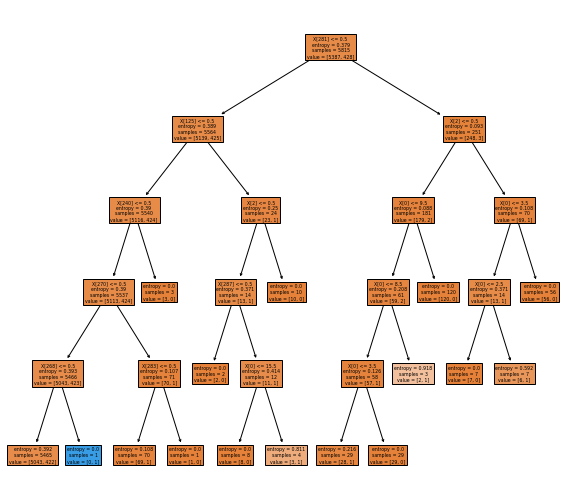

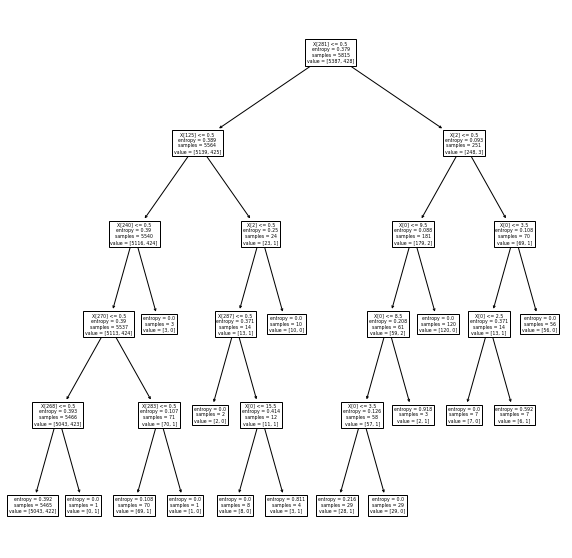

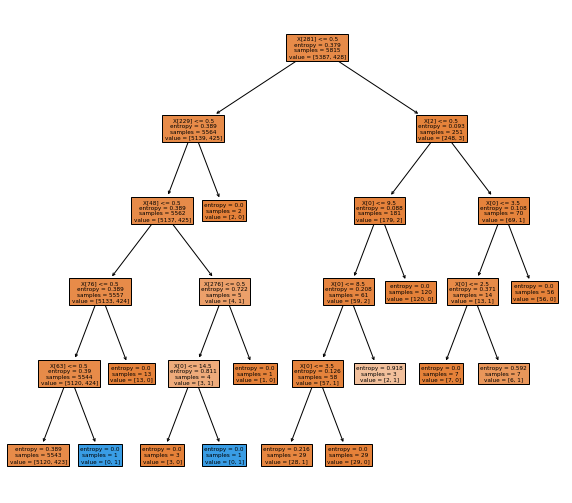

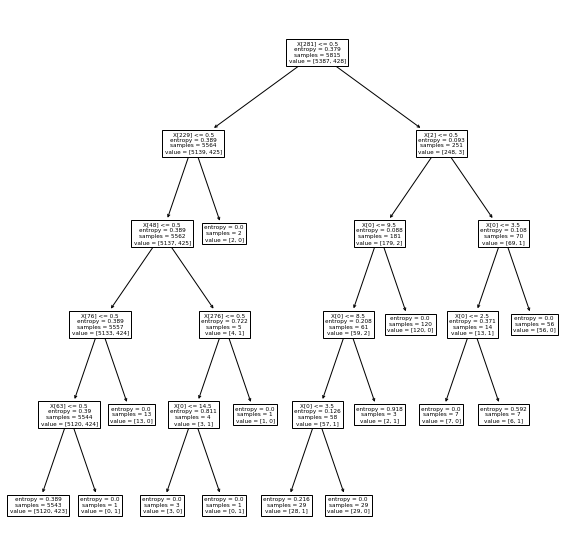

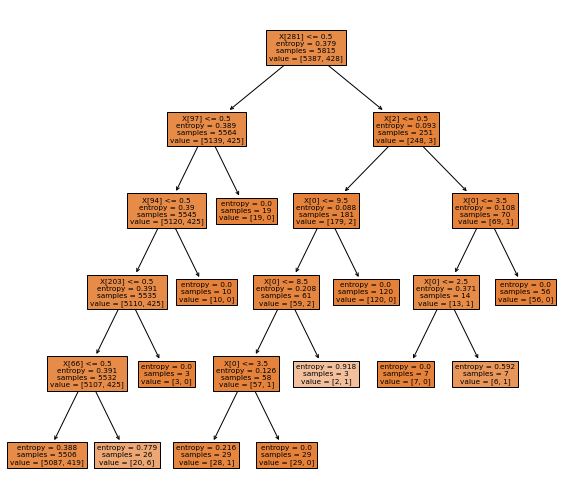

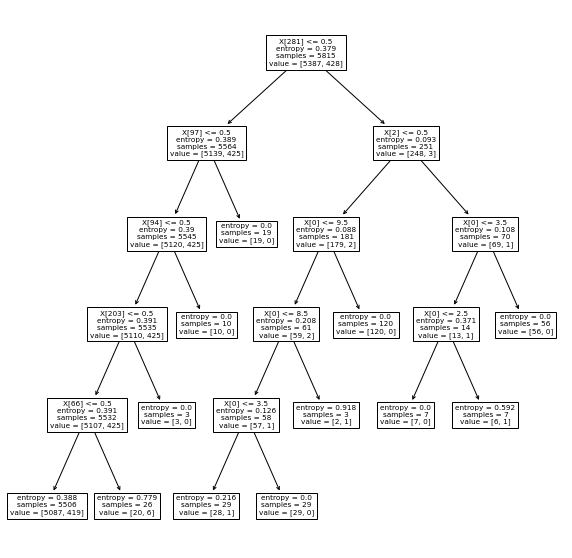

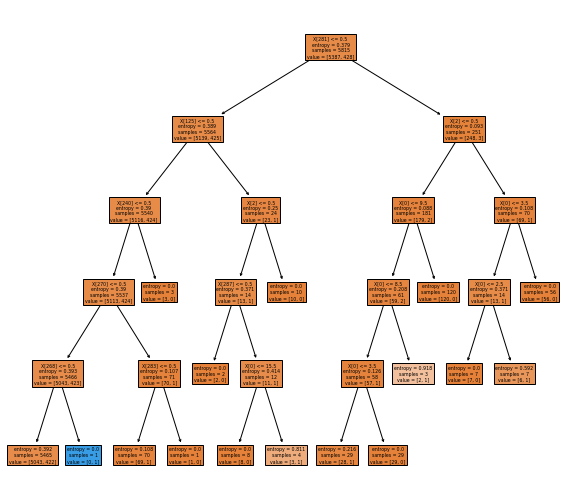

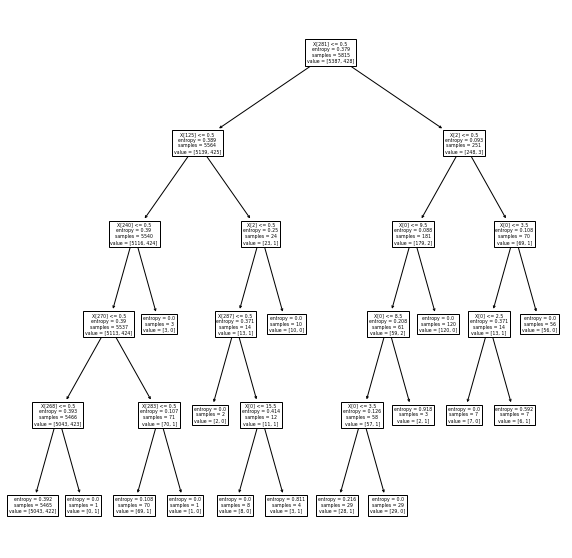

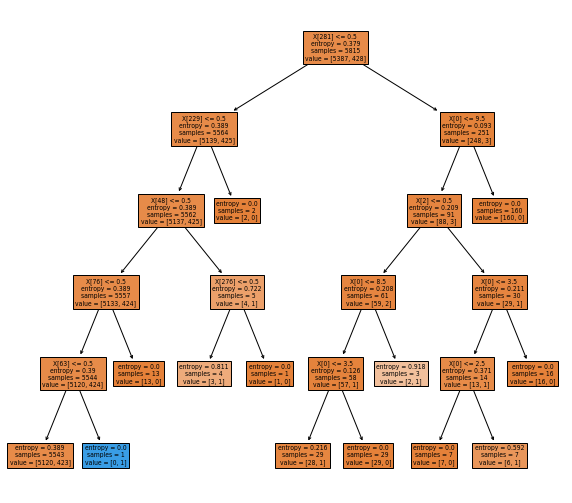

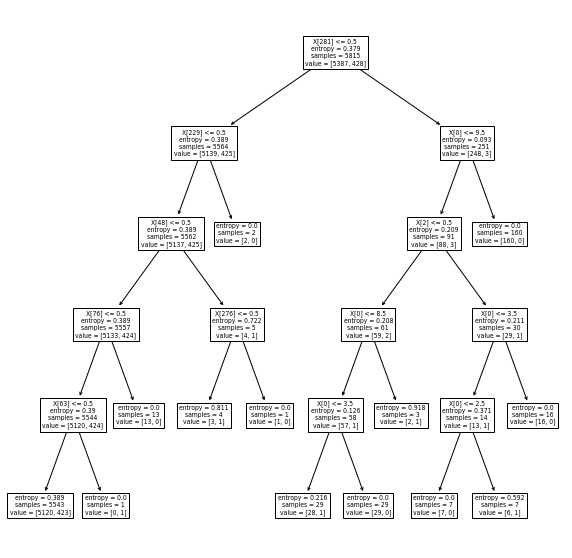

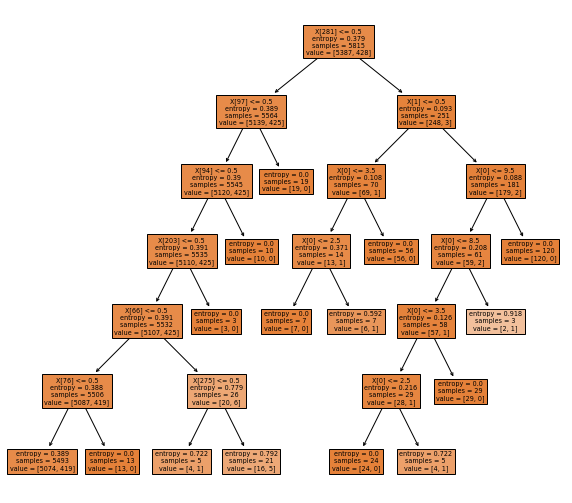

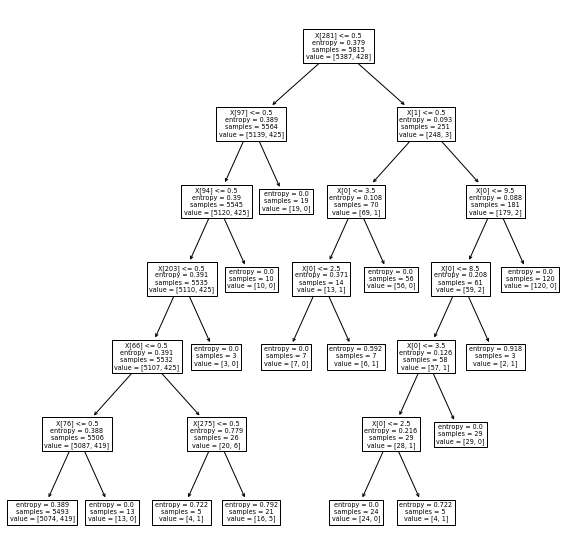

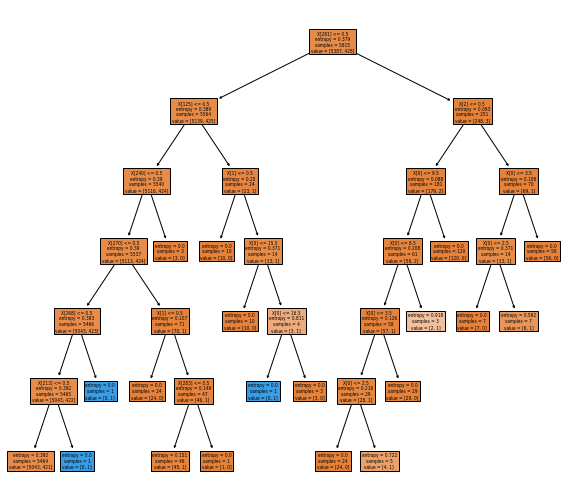

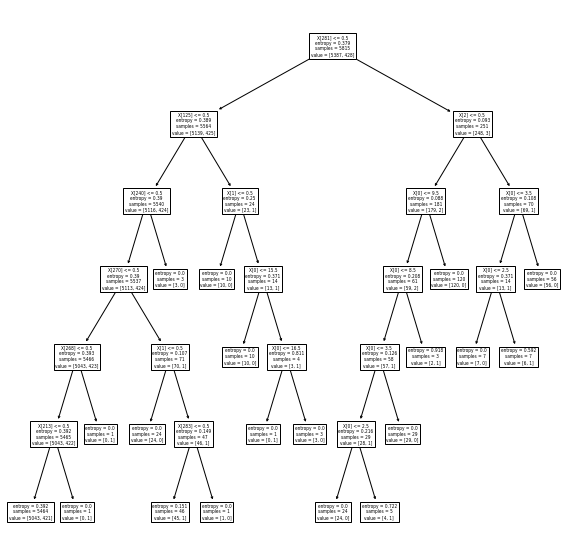

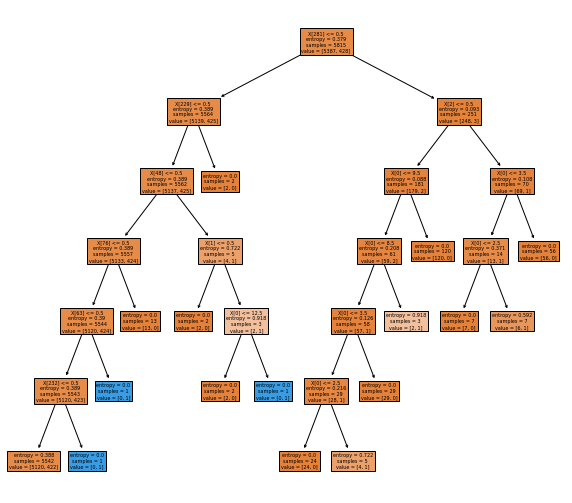

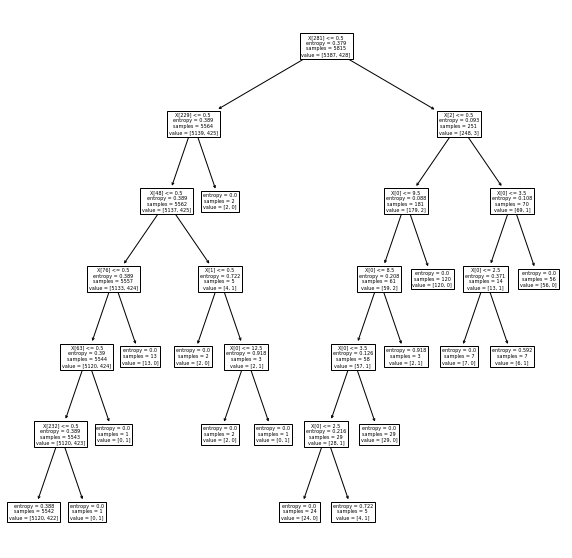

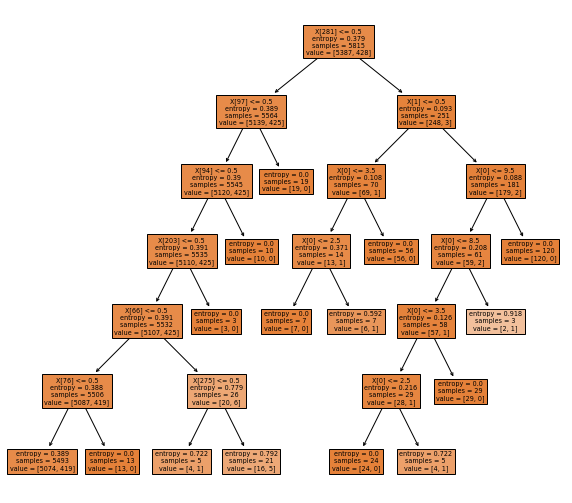

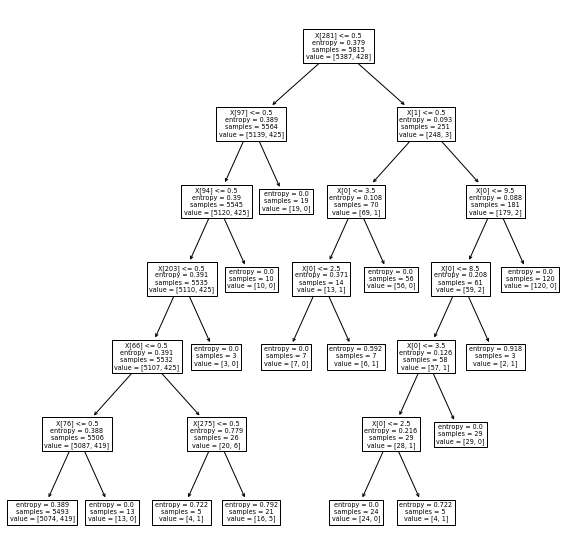

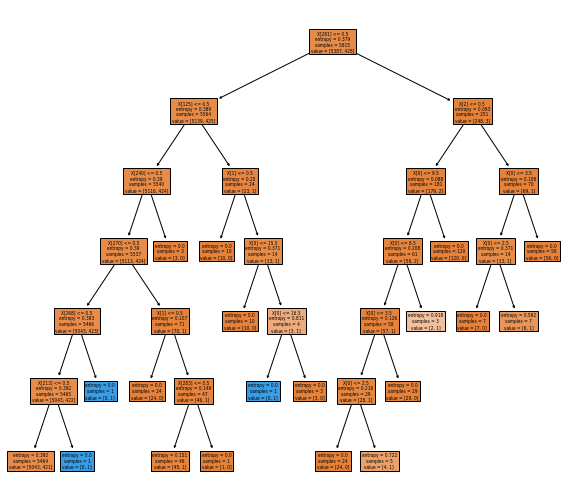

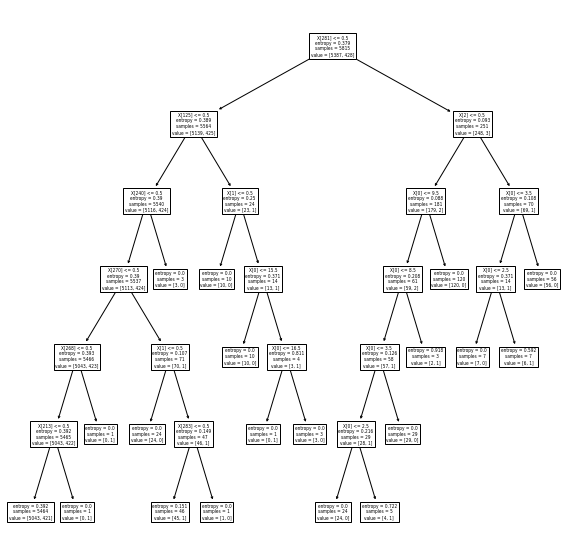

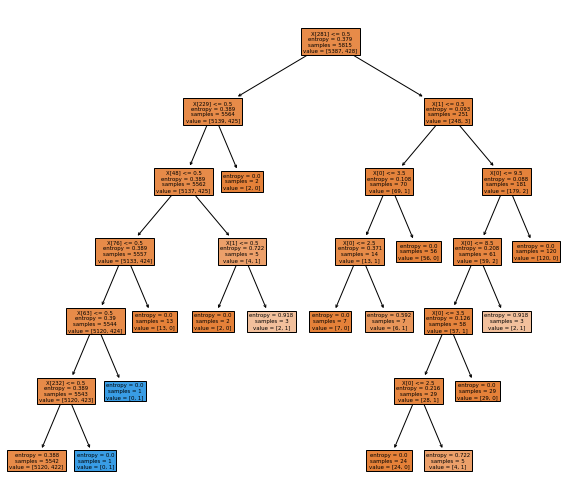

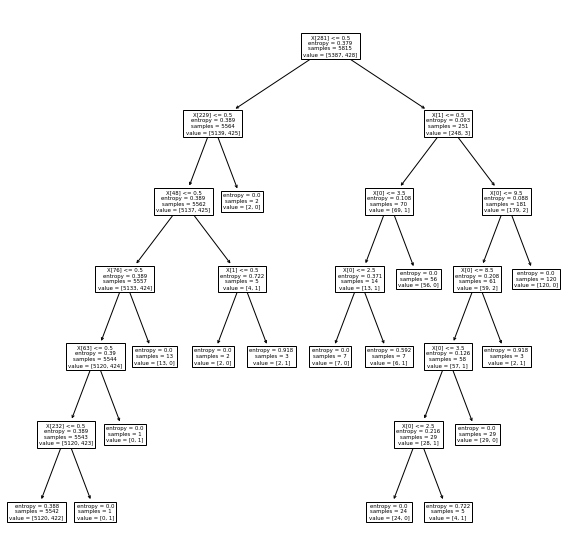

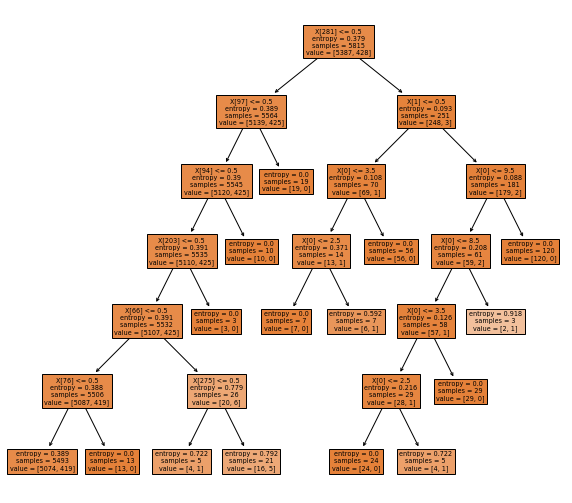

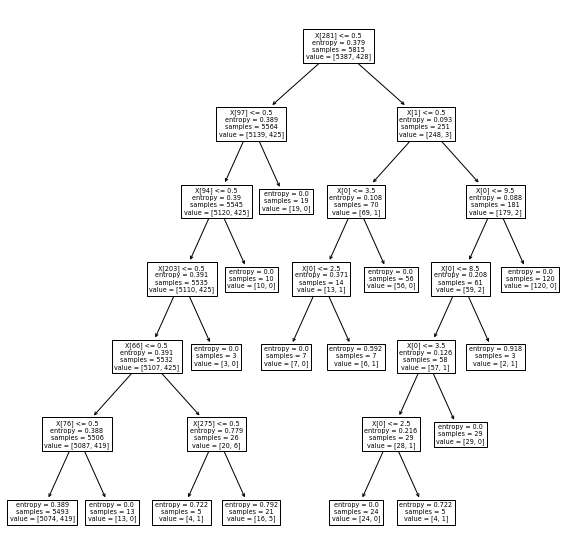

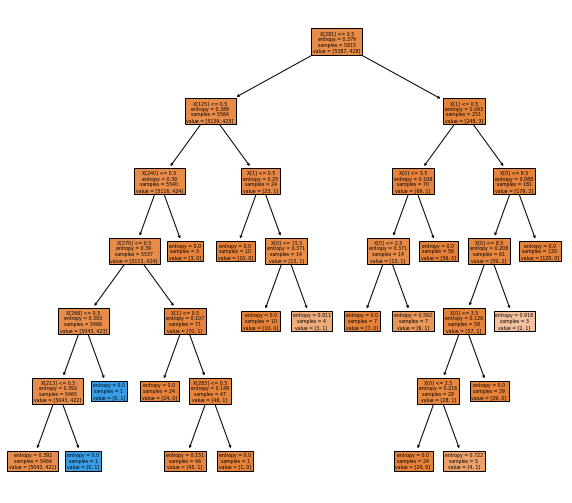

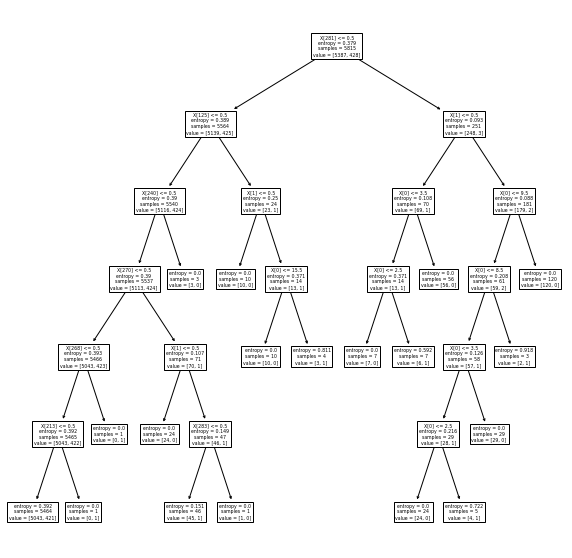

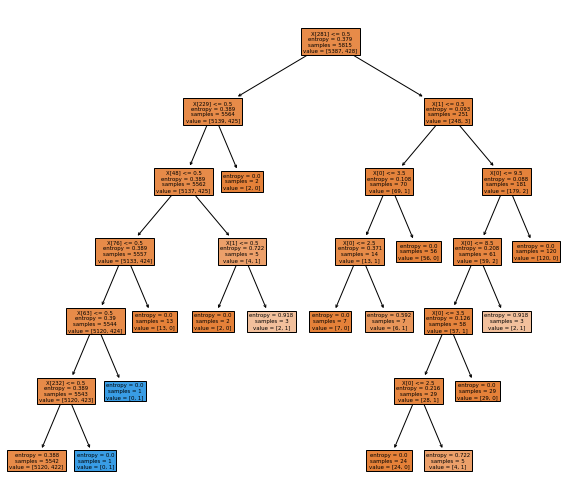

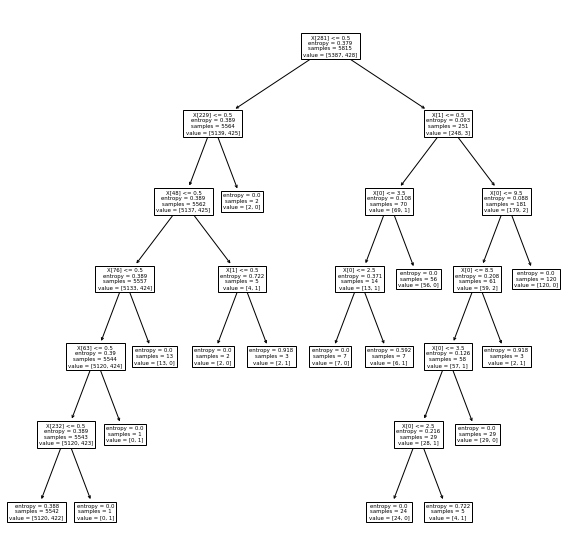

In [27]:
dtInstance.hyperparameterTune()

Spliting data into train,test samples
Fitting transformer
Done..
Training and logging to mlflow


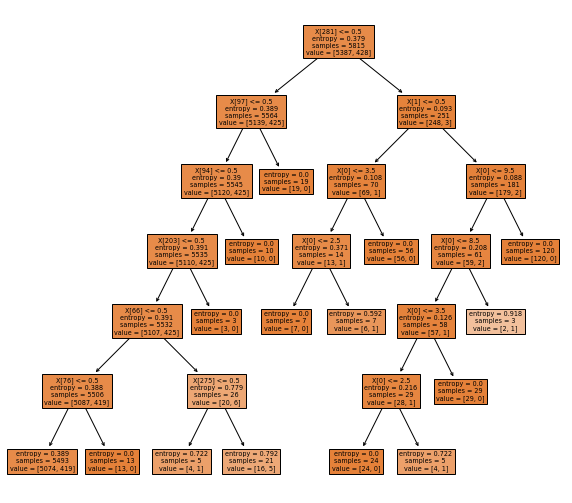

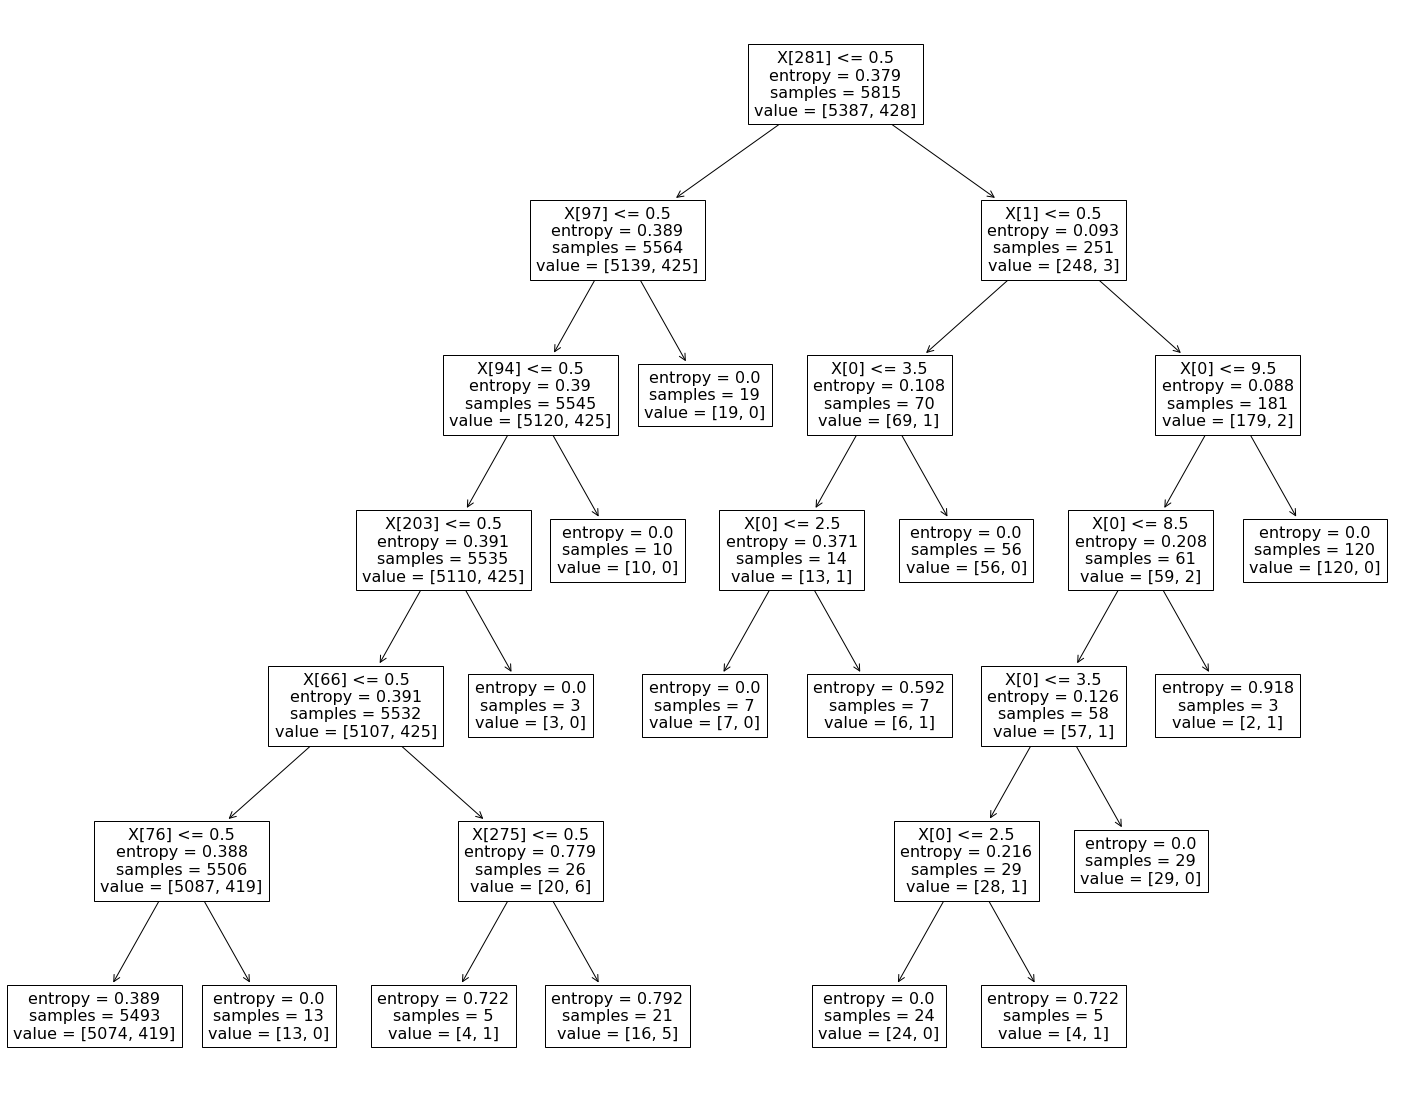

In [29]:
featureImp=dtInstance.trainModel(6,4,5)

## Feature Importance

In [30]:
featureImp

0
0.339523                      hour
0.000818        experiment_control
0.000000        experiment_exposed
0.000000     device_make_5008Y_EEA
0.000000         device_make_5099Y
...                            ...
0.000000        browser_Opera Mini
0.000000      browser_Opera Mobile
0.000000         browser_Pinterest
0.000000            browser_Puffin
0.000000  browser_Samsung Internet

[288 rows x 1 columns]

In [35]:
featureImp.sort_index(ascending=False).head(10)

0
0.410707          browser_Mobile Safari
0.339523                           hour
0.112610              device_make_LG-$2
0.057319           device_make_Pixel 3a
0.039044            device_make_Moto $2
0.030250            device_make_PRA-LX1
0.009086  device_make_Samsung SM-J500FN
0.000818             experiment_control
0.000642          browser_Chrome Mobile
0.000000   device_make_Samsung SM-G981B

In the browser dataset the top ten features that affect the outcome are 
is the mobile browser safari
the hour accessed
device make lg-$2
pixel
moto
pra-lx
samsun
and slighlty incuding the experiment they fall in 

In [ ]:
plt.figure(figsize=(17,19))
sns.heatmap(bData.corr(),annot=True)